In [6]:
import os
import pandas as pd

# Folder tempat file Excel disimpan
folder_path = "hasil_clustering"

# Nama file output gabungan
output_file = "gabungan_clustering_satu_sheet.xlsx"

# Nama file yang dikecualikan
excluded_file = "clustering_semua_sekolah.xlsx"

# List untuk menyimpan semua DataFrame
dataframes = []

# Loop melalui semua file di folder
for file_name in os.listdir(folder_path):
    if file_name.endswith('.xlsx') and file_name != excluded_file:
        # Membaca file Excel
        file_path = os.path.join(folder_path, file_name)
        df = pd.read_excel(file_path, engine='openpyxl')
        
        # Menambahkan kolom asal file untuk identifikasi
        df['sumber_file'] = file_name
        
        # Menambahkan DataFrame ke list
        dataframes.append(df)

# Menggabungkan semua DataFrame menjadi satu
gabungan_df = pd.concat(dataframes, ignore_index=True)

# Menyimpan DataFrame gabungan ke dalam file Excel
gabungan_df.to_excel(output_file, index=False, engine='openpyxl')

print(f"File gabungan berhasil dibuat: {output_file}")


File gabungan berhasil dibuat: gabungan_clustering_satu_sheet.xlsx


In [ ]:
import pandas as pd

# 1. Baca data mentah dan data hasil cleaning
df_raw = pd.read_excel("calon_mahasiswa_baru_2020-2024.xlsx")
df_clean = pd.read_excel("hasil_cleaning.xlsx")

# 2. Hitung baris dan kolom
rows_before = df_raw.shape[0]
rows_after = df_clean.shape[0]
cols_before = df_raw.shape[1]
cols_after = df_clean.shape[1]


# 3. Hitung jumlah nilai kosong sebelum dan sesudah
missing_before = df_raw.isnull().sum().sum()
missing_after = df_clean.isnull().sum().sum()
missing_filled = missing_before - missing_after

# 4. Hitung duplikat sebelum dan sesudah
dups_before = df_raw.duplicated().sum()
dups_after = df_clean.duplicated().sum()
dups_removed = dups_before  # Asumsi duplikat dihapus semua

# 5. Buat ringkasan ke dalam DataFrame
summary = pd.DataFrame({
    "Langkah Pembersihan": [
        "Menghapus baris kosong",
        "Menghapus duplikat",
        "Menghapus kolom tidak relevan",
        "Mengisi nilai kosong"
    ],
    "Jumlah Sebelum": [
        rows_before,
        rows_before,
        f"{cols_before} kolom",
        missing_before
    ],
    "Jumlah Sesudah": [
        rows_after,
        rows_after,
        f"{cols_after} kolom",
        missing_after
    ],
    "Jumlah yang Dihapus/Diisi": [
        rows_before - rows_after,
        dups_removed,
        f"{cols_before - cols_after} kolom",
        missing_filled
    ]
})

# 6. Tampilkan ringkasan
print("Ringkasan Proses Cleaning Data:")
display(summary)


Ringkasan Proses Cleaning Data:


,Langkah Pembersihan,Jumlah Sebelum,Jumlah Sesudah,Jumlah yang Dihapus/Diisi
0,Menghapus baris kosong,7177,7177,0
1,Menghapus duplikat,7177,7177,0
2,Menghapus kolom tidak relevan,24 kolom,13 kolom,11 kolom
3,Mengisi nilai kosong,33293,6943,26350


In [4]:
import pandas as pd

# Load data dari file Excel
file_path = "uploaded_files/cleaned_data.xlsx"  # Pastikan file berada di direktori kerja Anda
df = pd.read_excel(file_path, engine="openpyxl")

# Cek jumlah nilai kosong per kolom
missing_values = df.isnull().sum()

# Cek jumlah data duplikat berdasarkan nama_sekolah
duplicates = df.duplicated(subset=['no_daftar']).sum()

# Menampilkan kolom yang digunakan
columns_used = df.columns.tolist()

# Print hasil pemeriksaan data
print("\n📌 **Bukti Data Sudah Bersih**")
print("--------------------------------------------------")

# Menampilkan daftar kolom yang digunakan dalam dataset
print("\n📂 **Kolom yang Digunakan dalam Dataset:**")
print(duplicates)




📌 **Bukti Data Sudah Bersih**
--------------------------------------------------

📂 **Kolom yang Digunakan dalam Dataset:**
0


In [1]:
import pandas as pd

# Load data dari file Excel
file_path = "calon_mahasiswa_baru_2020-2024.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Hitung jumlah data pada kolom nama_sekolah yang tidak kosong
jumlah_nama_sekolah_valid = df['nama_sekolah'].notnull().sum()

# Cetak hasil
print("\n📌 *Jumlah Data nama_sekolah yang Tidak Kosong*")
print("--------------------------------------------------")
print(f"✅ Total nama_sekolah (tidak termasuk NaN): {jumlah_nama_sekolah_valid}")



📌 *Jumlah Data nama_sekolah yang Tidak Kosong*
--------------------------------------------------
✅ Total nama_sekolah (tidak termasuk NaN): 7108


In [3]:
import pandas as pd

# Load data dari file Excel
file_path = "calon_mahasiswa_baru_2020-2024.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Hitung jumlah nilai kosong pada kolom spesifik
missing_nama_sekolah = df['nama_sekolah'].isnull().sum()
missing_kota_sek = df['kota_sek'].isnull().sum()
missing_prop_sek = df['prop_sek'].isnull().sum()

# Print hasil pemeriksaan data
print("\n📌 **Bukti Data Sudah Bersih**")
print("--------------------------------------------------")
print(f"🏫 Nilai kosong di kolom nama_sekolah: {missing_nama_sekolah}")
print(f"🏙️ Nilai kosong di kolom kota_sek: {missing_kota_sek}")
print(f"🌍 Nilai kosong di kolom prop_sek: {missing_prop_sek}")


📌 **Bukti Data Sudah Bersih**
--------------------------------------------------
🏫 Nilai kosong di kolom nama_sekolah: 69
🏙️ Nilai kosong di kolom kota_sek: 179
🌍 Nilai kosong di kolom prop_sek: 69


In [10]:
import json

# Fungsi untuk menentukan jenis bentuk pendidikan
def normalize_bentuk_pendidikan(sekolah_name):
    if sekolah_name.startswith("SMAS") or sekolah_name.startswith("SMAN") or sekolah_name.startswith("SMA") or sekolah_name.startswith("SMAK") or sekolah_name.startswith("SMASK"):
        return "SMA"
    elif sekolah_name.startswith("SMKS") or sekolah_name.startswith("SMKN") or sekolah_name.startswith("SMK"):
        return "SMK"
    elif sekolah_name.startswith("MA") or sekolah_name.startswith("MAK") or sekolah_name.startswith("MAS") or sekolah_name.startswith("MAN"):
        return "MA"
    elif sekolah_name.startswith("PKBM"):
        return "PKBM"
    else:
        return "Unknown"  # Jika tidak termasuk dalam kategori di atas

# Fungsi untuk mengubah format JSON dan normalisasi 'bentuk'
def transform_json_format(data):
    # Mengelompokkan data berdasarkan kode kabupaten
    grouped_data = {}

    for key in data.keys():
        if isinstance(data[key], list):
            for entry in data[key]:
                # Ambil nama sekolah dan bentuk pendidikan
                school_name = entry.get("sekolah")
                bentuk_pendidikan = entry.get("bentuk")

                # Normalisasi bentuk pendidikan
                if isinstance(bentuk_pendidikan, list):
                    # Ambil yang pertama jika bentuk pendidikan dalam list
                    entry["bentuk"] = normalize_bentuk_pendidikan(school_name)
                else:
                    # Jika sudah dalam format string, periksa dan perbarui
                    entry["bentuk"] = normalize_bentuk_pendidikan(school_name)

                # Simpan data berdasarkan kode kabupaten
                kabupaten_kode = entry.get("kode_kab_kota")
                if kabupaten_kode not in grouped_data:
                    grouped_data[kabupaten_kode] = []
                grouped_data[kabupaten_kode].append(entry)

    return grouped_data

# Fungsi untuk memuat data JSON dari file
def load_data_from_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

# Fungsi untuk menyimpan data JSON ke dalam file di folder tertentu
def save_transformed_json_to_existing_folder(grouped_data, original_folder_path='./hasil'):
    # Iterasi untuk menyimpan hasil transformasi dalam file yang sudah ada di folder
    for file_name in os.listdir(original_folder_path):
        file_path = os.path.join(original_folder_path, file_name)
        
        if file_name.endswith('.json'):
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)

            # Transformasi data
            transformed_data = transform_json_format(data)

            # Menyimpan file JSON yang sudah diubah ke dalam file yang sudah ada
            with open(file_path, 'w', encoding='utf-8') as f:
                json.dump(transformed_data, f, ensure_ascii=False, indent=4)
            print(f"File berhasil disimpan di {file_path}")

# Contoh penggunaan
original_folder_path = './hasil'  # Folder tempat file JSON asli berada

# Iterasi untuk menyimpan hasil transformasi dalam file asli
save_transformed_json_to_existing_folder(original_folder_path)


File berhasil disimpan di ./hasil\010101.json
File berhasil disimpan di ./hasil\010102.json
File berhasil disimpan di ./hasil\016001.json
File berhasil disimpan di ./hasil\016002.json
File berhasil disimpan di ./hasil\016003.json
File berhasil disimpan di ./hasil\016004.json
File berhasil disimpan di ./hasil\016005.json
File berhasil disimpan di ./hasil\016006.json
File berhasil disimpan di ./hasil\016007.json
File berhasil disimpan di ./hasil\016008.json
File berhasil disimpan di ./hasil\016101.json
File berhasil disimpan di ./hasil\016102.json
File berhasil disimpan di ./hasil\016103.json
File berhasil disimpan di ./hasil\016104.json
File berhasil disimpan di ./hasil\016105.json
File berhasil disimpan di ./hasil\016106.json
File berhasil disimpan di ./hasil\016201.json
File berhasil disimpan di ./hasil\016202.json
File berhasil disimpan di ./hasil\016203.json
File berhasil disimpan di ./hasil\016204.json
File berhasil disimpan di ./hasil\016205.json
File berhasil disimpan di ./hasil\

In [ ]:
import json
import os

# Fungsi untuk memuat data JSON dari file
def load_data_from_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

# Fungsi untuk melakukan transformasi data pada 'propinsi'
def transform_json_format(data):
    for key, items in data.items():
        for item in items:
            # Memeriksa dan mengubah nilai propinsi
            if item.get('propinsi') == "Prov. Papua Selatan" or item.get('propinsi') == "Prov. Papua Tengah":
                item['propinsi'] = "Prov. Papua"
    return data

# Fungsi untuk menyimpan data JSON ke dalam file di folder tertentu
def save_transformed_json_to_existing_folder(original_folder_path='./hasil'):
    # Iterasi untuk menyimpan hasil transformasi dalam file yang sudah ada di folder
    for file_name in os.listdir(original_folder_path):
        file_path = os.path.join(original_folder_path, file_name)
        
        if file_name.endswith('.json'):
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)

            # Transformasi data
            transformed_data = transform_json_format(data)

            # Menyimpan file JSON yang sudah diubah ke dalam file yang sudah ada
            with open(file_path, 'w', encoding='utf-8') as f:
                json.dump(transformed_data, f, ensure_ascii=False, indent=4)
            print(f"File berhasil disimpan di {file_path}")

# Contoh penggunaan
original_folder_path = './hasil'  # Folder tempat file JSON asli berada

# Iterasi untuk menyimpan hasil transformasi dalam file asli
save_transformed_json_to_existing_folder(original_folder_path)


File berhasil disimpan di ./hasil\010101.json
File berhasil disimpan di ./hasil\010102.json
File berhasil disimpan di ./hasil\016001.json
File berhasil disimpan di ./hasil\016002.json
File berhasil disimpan di ./hasil\016003.json
File berhasil disimpan di ./hasil\016004.json
File berhasil disimpan di ./hasil\016005.json
File berhasil disimpan di ./hasil\016006.json
File berhasil disimpan di ./hasil\016007.json
File berhasil disimpan di ./hasil\016008.json
File berhasil disimpan di ./hasil\016101.json
File berhasil disimpan di ./hasil\016102.json
File berhasil disimpan di ./hasil\016103.json
File berhasil disimpan di ./hasil\016104.json
File berhasil disimpan di ./hasil\016105.json
File berhasil disimpan di ./hasil\016106.json
File berhasil disimpan di ./hasil\016201.json
File berhasil disimpan di ./hasil\016202.json
File berhasil disimpan di ./hasil\016203.json
File berhasil disimpan di ./hasil\016204.json
File berhasil disimpan di ./hasil\016205.json
File berhasil disimpan di ./hasil\

: 

In [1]:

import json
import os

# Fungsi untuk memuat data JSON dari file
def load_data_from_json_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data

# Fungsi untuk melakukan transformasi data pada 'propinsi'
def transform_json_format(data):
    for key, items in data.items():
        for item in items:
            # Memeriksa dan mengubah nilai propinsi
            if item.get('propinsi') == "Prov. Papua Barat Daya":
                item['propinsi'] = "Prov. Papua Barat"
    return data

# Fungsi untuk menyimpan data JSON ke dalam file di folder tertentu
def save_transformed_json_to_existing_folder(original_folder_path='./hasil'):
    # Iterasi untuk menyimpan hasil transformasi dalam file yang sudah ada di folder
    for file_name in os.listdir(original_folder_path):
        file_path = os.path.join(original_folder_path, file_name)
        
        if file_name.endswith('.json'):
            with open(file_path, 'r', encoding='utf-8') as file:
                data = json.load(file)

            # Transformasi data
            transformed_data = transform_json_format(data)

            # Menyimpan file JSON yang sudah diubah ke dalam file yang sudah ada
            with open(file_path, 'w', encoding='utf-8') as f:
                json.dump(transformed_data, f, ensure_ascii=False, indent=4)
            print(f"File berhasil disimpan di {file_path}")

# Contoh penggunaan
original_folder_path = './hasil'  # Folder tempat file JSON asli berada

# Iterasi untuk menyimpan hasil transformasi dalam file asli
save_transformed_json_to_existing_folder(original_folder_path)


File berhasil disimpan di ./hasil\010101.json
File berhasil disimpan di ./hasil\010102.json
File berhasil disimpan di ./hasil\016001.json
File berhasil disimpan di ./hasil\016002.json
File berhasil disimpan di ./hasil\016003.json
File berhasil disimpan di ./hasil\016004.json
File berhasil disimpan di ./hasil\016005.json
File berhasil disimpan di ./hasil\016006.json
File berhasil disimpan di ./hasil\016007.json
File berhasil disimpan di ./hasil\016008.json
File berhasil disimpan di ./hasil\016101.json
File berhasil disimpan di ./hasil\016102.json
File berhasil disimpan di ./hasil\016103.json
File berhasil disimpan di ./hasil\016104.json
File berhasil disimpan di ./hasil\016105.json
File berhasil disimpan di ./hasil\016106.json
File berhasil disimpan di ./hasil\016201.json
File berhasil disimpan di ./hasil\016202.json
File berhasil disimpan di ./hasil\016203.json
File berhasil disimpan di ./hasil\016204.json
File berhasil disimpan di ./hasil\016205.json
File berhasil disimpan di ./hasil\

In [2]:
import os
import json

def find_json_file(directory, kabupaten, provinsi):
    """Mencari file JSON yang mengandung data kabupaten dan provinsi tertentu."""
    
    # Mengiterasi file dalam direktori
    for root, dirs, files in os.walk(directory):
        for file in files:
            # Pastikan hanya memproses file dengan ekstensi .json
            if file.endswith('.json'):
                file_path = os.path.join(root, file)
                
                # Baca file JSON
                with open(file_path, 'r', encoding='utf-8') as f:
                    try:
                        data = json.load(f)
                        
                        # Cek apakah kabupaten dan provinsi terdapat dalam data
                        if 'kabupaten_kota' in data and 'propinsi' in data:
                            if kabupaten in data['kabupaten_kota'] and provinsi in data['propinsi']:
                                print(f"File ditemukan: {file_path}")
                                return file_path  # Mengembalikan lokasi file jika ditemukan
                    except json.JSONDecodeError:
                        print(f"File {file} tidak dapat dibaca sebagai JSON.")
    
    print("File tidak ditemukan.")
    return None  # Jika tidak ditemukan file yang cocok

# Panggil fungsi dengan direktori yang sesuai dan nama kabupaten serta provinsi
directory_to_search = './hasil'  # Ganti dengan path direktori yang sesuai
kabupaten_to_find = "Kab. Tambrauw"
provinsi_to_find = "Prov. Papua Barat"

# Cari file
find_json_file(directory_to_search, kabupaten_to_find, provinsi_to_find)


File tidak ditemukan.


In [11]:
%pip install python-Levenshtein


  Using cached python_Levenshtein-0.26.1-py3-none-any.whl.metadata (3.7 kB)
Using cached python_Levenshtein-0.26.1-py3-none-any.whl (9.4 kB)
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   -------------------------- ------------- 1.0/1.6 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 3.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
%pip install fuzzywuzzy

  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl.metadata (4.9 kB)
Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [11]:
import Levenshtein

# Nama-nama yang akan dihitung jarak Levenshteinnya
name1 = "SMA SANTO ALOYSIUS 1"
name2 = "SMAS ALLOYSIUS 1"

# Menggunakan metode Levenshtein untuk menghitung jarak Levenshtein
distance = Levenshtein.distance(name1, name2)

# Menampilkan hasil jarak Levenshtein
print(f"Levenshtein distance: {distance}")


Levenshtein distance: 6


In [19]:
from fuzzywuzzy import fuzz

# Data yang akan dibandingkan
name1 = "SMA SANTO ALLOYSIUS 1"
name2 = "SMAS ALLOYSIUS 1"

# Membagi kedua string menjadi list kata-kata
name1_words = name1.split()
name2_words = name2.split()

# Menggunakan partial_ratio untuk membandingkan dua list kata
partial_match = fuzz.token_sort_ratio(" ".join(name1_words), " ".join(name2_words))

# Menentukan threshold
threshold = 82

# Memeriksa apakah kecocokan lebih dari threshold
if partial_match >= threshold:
    print(f"Strings match with a score of {partial_match}, which is above the threshold.")
else:
    print(f"Strings do not match, score is {partial_match}, which is below the threshold.")


Strings do not match, score is 81, which is below the threshold.


In [6]:
import pandas as pd

# Ganti dengan path ke file Excel Anda
file_path = 'exported_clustering_prodi (6).xlsx'

# Baca file Excel
df = pd.read_excel(file_path)

# Hitung masing-masing komponen pembobotan
df['bobot_choice1'] = df['jumlah_choice1'] * 0.3
df['bobot_choice2'] = df['jumlah_choice2'] * -0.1
df['bobot_terima'] = df['jumlah_terima'] * 0.2
df['bobot_registrasi'] = df['jumlah_registrasi'] * 0.3

# Hitung total skor akhir
df['skor_akhir'] = df['bobot_choice1'] + df['bobot_choice2'] + df['bobot_terima'] + df['bobot_registrasi']

# Tampilkan hasilnya dengan output yang scrollable jika panjang
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[[
        'program_studi', 'nama_sekolah', 
        'bobot_choice1', 'bobot_choice2', 'bobot_terima', 'bobot_registrasi', 'skor_akhir'
    ]])


,program_studi,nama_sekolah,bobot_choice1,bobot_choice2,bobot_terima,bobot_registrasi,skor_akhir
0,Sistem Informasi,SMAN 1 PAYANGAN,0.3,-0.0,0.2,0.3,0.8
1,Sistem Informasi,SMAN 2 DENPASAR,0.0,-0.1,0.0,0.0,-0.1
2,Sistem Informasi,SMAS K SANTO YOSEPH DENPASAR,0.3,-0.1,0.2,0.3,0.7
3,Sistem Informasi,SMK PENERBANGAN CAKRA NUSANTARA DENPASAR,0.0,-0.1,0.0,0.0,-0.1
4,Sistem Informasi,SMKS PARIWISATA HARAPAN DENPASAR,0.3,-0.0,0.2,0.3,0.8
5,Sistem Informasi,SMKS TI BALI GLOBAL,0.3,-0.0,0.2,0.0,0.5
6,Sistem Informasi,PKBM WIJAYA KUSUMA,0.3,-0.0,0.2,0.3,0.8
7,Sistem Informasi,SMA GENIUS,0.0,-0.1,0.0,0.0,-0.1
8,Sistem Informasi,SMAN 1 KABUPATEN TANGERANG,0.3,-0.0,0.2,0.0,0.5
9,Sistem Informasi,SMAN 13 KABUPATEN TANGERANG,0.3,-0.0,0.2,0.3,0.8


In [7]:
import pandas as pd

# Ganti dengan path ke file Excel Anda
file_path = 'exported_clustering_prodi (7).xlsx'

# Baca file Excel
df = pd.read_excel(file_path)

# Hitung masing-masing komponen pembobotan
df['bobot_choice1'] = df['jumlah_choice1'] * 0.3
df['bobot_choice2'] = df['jumlah_choice2'] * -0.1
df['bobot_terima'] = df['jumlah_terima'] * 0.2
df['bobot_registrasi'] = df['jumlah_registrasi'] * 0.3

# Hitung total skor akhir
df['skor_akhir'] = df['bobot_choice1'] + df['bobot_choice2'] + df['bobot_terima'] + df['bobot_registrasi']

# Tampilkan hasilnya dengan output yang scrollable jika panjang
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[[
        'program_studi', 'nama_sekolah', 
        'bobot_choice1', 'bobot_choice2', 'bobot_terima', 'bobot_registrasi', 'skor_akhir'
    ]])


,program_studi,nama_sekolah,bobot_choice1,bobot_choice2,bobot_terima,bobot_registrasi,skor_akhir
0,Informatika,MINISTERIO DA EDUCACAO JUVENTUDE E DESPORTO,0.0,-0.1,0.0,0.0,-0.1
1,Informatika,SMAN 3 BANDA ACEH,0.3,-0.0,0.2,0.3,0.8
2,Informatika,SMAN 1 KUBU,0.3,-0.0,0.0,0.0,0.3
3,Informatika,SMAN 1 SELEMADEG,0.0,-0.1,0.0,0.0,-0.1
4,Informatika,SMAN 1 TABANAN,0.0,-0.1,0.0,0.0,-0.1
5,Informatika,SMAN 2 TABANAN,0.0,-0.1,0.0,0.0,-0.1
6,Informatika,SMAN 1 DENPASAR,0.0,-0.1,0.2,0.0,0.1
7,Informatika,SMAN 2 DENPASAR,0.3,-0.0,0.2,0.0,0.5
8,Informatika,SMAN 7 DENPASAR,0.0,-0.1,0.2,0.0,0.1
9,Informatika,SMAS K SANTO YOSEPH DENPASAR,0.6,-0.1,0.4,0.6,1.5


In [5]:
import pandas as pd

# Ganti dengan path ke file Excel Anda
file_path = 'exported_clustering_prodi (8).xlsx'

# Baca file Excel
df = pd.read_excel(file_path)

# Hitung masing-masing komponen pembobotan
df['bobot_choice1'] = df['jumlah_choice1'] * 0.3
df['bobot_choice2'] = df['jumlah_choice2'] * -0.1
df['bobot_terima'] = df['jumlah_terima'] * 0.2
df['bobot_registrasi'] = df['jumlah_registrasi'] * 0.3

# Hitung total skor akhir
df['skor_akhir'] = df['bobot_choice1'] + df['bobot_choice2'] + df['bobot_terima'] + df['bobot_registrasi']

# Tampilkan hasilnya dengan output yang scrollable jika panjang
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[[
        'program_studi', 'nama_sekolah', 
        'bobot_choice1', 'bobot_choice2', 'bobot_terima', 'bobot_registrasi', 'skor_akhir'
    ]])


,program_studi,nama_sekolah,bobot_choice1,bobot_choice2,bobot_terima,bobot_registrasi,skor_akhir
0,Arsitektur,SANTO JOHN'S CATHOLIC COLLEGE,0.3,-0.0,0.2,0.3,0.8
1,Arsitektur,SEKOLAH MENENGAH SAYYIDINA ALI,0.0,-0.1,0.0,0.0,-0.1
2,Arsitektur,COLEGIO DE SAO PEDRO,0.3,-0.0,0.0,0.0,0.3
3,Arsitektur,MINISTERIO DA EDUCACAO JUVENTUDE E DESPORTO,0.3,-0.0,0.2,0.3,0.8
4,Arsitektur,SMAS PANTI HARAPAN,0.3,-0.0,0.2,0.3,0.8
5,Arsitektur,SMAN 1 KUTA UTARA,0.0,-0.1,0.0,0.0,-0.1
6,Arsitektur,SMAN 2 KUTA SELATAN,0.3,-0.0,0.2,0.3,0.8
7,Arsitektur,SMKS WIRA HARAPAN,0.3,-0.0,0.2,0.0,0.5
8,Arsitektur,SMKN 1 BANGLI,0.3,-0.0,0.2,0.3,0.8
9,Arsitektur,SMAN 1 GEROKGAK,0.0,-0.1,0.0,0.0,-0.1


In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load data dari file Excel
file_path = "exported_clustering.xlsx"  # Pastikan file berada di direktori kerja Anda
df = pd.read_excel(file_path)

# Pastikan kolom angka dibaca sebagai float
df['skor_akhir_normalized'] = df['skor_akhir_normalized'].astype(float)

# Ambil daftar unik kota
daftar_kota = df['kota_sek'].unique()

# Inisialisasi hasil
hasil = []

# Loop jumlah cluster (2, 3, 4)
for n_cluster in [2, 3, 4]:
    for kota in daftar_kota:
        df_kota = df[df['kota_sek'] == kota]

        if len(df_kota) > n_cluster:
            try:
                X = df_kota[['skor_akhir_normalized']].values
                model = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
                label = model.fit_predict(X)
                score = silhouette_score(X, label)
                hasil.append({
                    'n_cluster': n_cluster,
                    'kota_sek': kota,
                    'silhouette_score': round(score, 4)
                })
            except Exception as e:
                hasil.append({
                    'n_cluster': n_cluster,
                    'kota_sek': kota,
                    'silhouette_score': f"Error: {str(e)}"
                })
        else:
            hasil.append({
                'n_cluster': n_cluster,
                'kota_sek': kota,
                'silhouette_score': "Data kurang"
            })

# Buat DataFrame hasil
df_hasil = pd.DataFrame(hasil)


# Cari jumlah cluster terbaik untuk setiap kota
print("\n=== CLUSTER TERBAIK PER KOTA ===")
cluster_terbaik = []

for kota in daftar_kota:
    df_kota_scores = df_hasil[
        (df_hasil['kota_sek'] == kota) &
        (df_hasil['silhouette_score'].apply(lambda x: isinstance(x, float)))
    ]
    if not df_kota_scores.empty:
        best_row = df_kota_scores.loc[df_kota_scores['silhouette_score'].idxmax()]
        cluster_terbaik.append({
            'kota_sek': kota,
            'n_cluster_terbaik': best_row['n_cluster'],
            'silhouette_score': best_row['silhouette_score']
        })
        print(f"KOTA {kota:<30} -> {best_row['n_cluster']} cluster (skor: {best_row['silhouette_score']})")
    else:
        print(f"KOTA {kota:<30} -> Tidak cukup data / error")

# Buat DataFrame dari hasil cluster terbaik
df_cluster_terbaik = pd.DataFrame(cluster_terbaik)
df_cluster_terbaik = df_cluster_terbaik.rename(columns={
    'n_cluster_terbaik': 'jumlah_cluster_optimal',
    'silhouette_score': 'skor_silhouette'
})

# Format skor menjadi string dengan koma sebagai pemisah desimal
df_cluster_terbaik['skor_silhouette'] = df_cluster_terbaik['skor_silhouette'].apply(
    lambda x: f"{x:.4f}".replace('.', ',') if isinstance(x, float) else x
)

# Simpan ke Excel
output_path = "hasil_cluster_per_kota.xlsx"
df_cluster_terbaik.to_excel(output_path, index=False)

print(f"\nHasil export disimpan di: {output_path}")



d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(esti


=== CLUSTER TERBAIK PER KOTA ===
KOTA BELANDA                        -> Tidak cukup data / error
KOTA LAINNYA                        -> 2 cluster (skor: 0.3417)
KOTA TIMOR LESTE                    -> 2 cluster (skor: 0.7861)
KOTA KAB. ACEH TENGGARA             -> Tidak cukup data / error
KOTA KOTA BANDA ACEH                -> Tidak cukup data / error
KOTA KAB. BADUNG                    -> 2 cluster (skor: 0.6961)
KOTA KAB. BANGLI                    -> Tidak cukup data / error
KOTA KAB. BULELENG                  -> 2 cluster (skor: 0.6509)
KOTA KAB. GIANYAR                   -> 2 cluster (skor: 0.583)
KOTA KAB. JEMBRANA                  -> 2 cluster (skor: 0.5578)
KOTA KAB. KARANG ASEM               -> 2 cluster (skor: 0.3854)
KOTA KAB. KLUNGKUNG                 -> Tidak cukup data / error
KOTA KAB. TABANAN                   -> 2 cluster (skor: 0.2595)
KOTA KOTA DENPASAR                  -> 2 cluster (skor: 0.8549)
KOTA KAB. LEBAK                     -> Tidak cukup data / error
KOTA KA

=== SKOR SILHOUETTE UNTUK SELURUH DATA PROVINSI ===
2 cluster -> skor silhouette: 0.8425
3 cluster -> skor silhouette: 0.7453
4 cluster -> skor silhouette: 0.6759


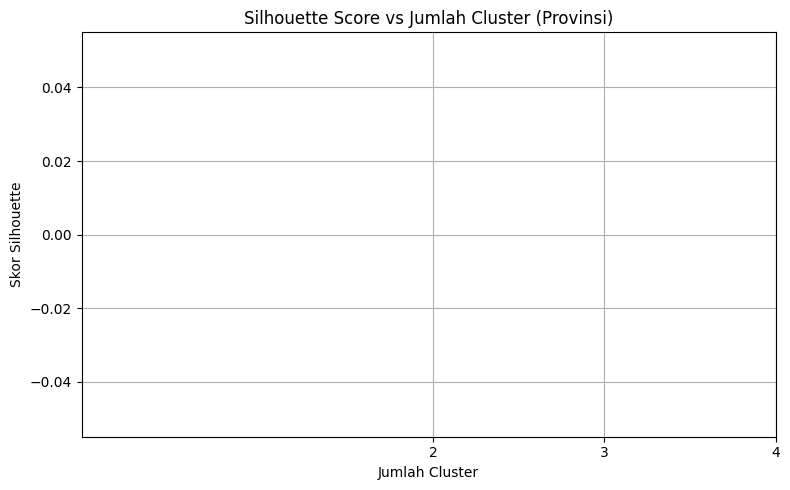

In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load data
file_path = "exported_clustering.xlsx"
df = pd.read_excel(file_path)

# Pastikan kolom angka benar
df['total_score_prov'] = df['total_score_prov'].astype(float)

# Siapkan fitur untuk clustering
X = df[['total_score_prov']].values

# Simpan hasil
hasil = []

# Uji jumlah cluster optimal dari seluruh data provinsi
print("=== SKOR SILHOUETTE UNTUK SELURUH DATA PROVINSI ===")
for n_cluster in [2, 3, 4]:
    if len(df) > n_cluster:
        try:
            model = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
            label = model.fit_predict(X)
            score = silhouette_score(X, label)
            hasil.append({
                'jumlah_cluster': n_cluster,
                'skor_silhouette': round(score, 4)
            })
            print(f"{n_cluster} cluster -> skor silhouette: {score:.4f}")
        except Exception as e:
            print(f"{n_cluster} cluster -> Error: {str(e)}")
            hasil.append({
                'jumlah_cluster': n_cluster,
                'skor_silhouette': f"Error: {str(e)}"
            })
    else:
        print(f"{n_cluster} cluster -> Data kurang")
        hasil.append({
            'jumlah_cluster': n_cluster,
            'skor_silhouette': "Data kurang"
        })

# Konversi ke DataFrame
df_hasil = pd.DataFrame(hasil)

# Format skor jadi string dengan koma jika diinginkan
df_hasil['skor_silhouette'] = df_hasil['skor_silhouette'].apply(
    lambda x: f"{x:.4f}".replace('.', ',') if isinstance(x, float) else x
)

df_hasil

import matplotlib.pyplot as plt

# Filter hanya baris dengan skor float (bukan "Data kurang" atau "Error")
df_plot = df_hasil[df_hasil['skor_silhouette'].apply(lambda x: isinstance(x, float))]

# Buat plot
plt.figure(figsize=(8, 5))
plt.plot(df_plot['jumlah_cluster'], df_plot['skor_silhouette'], marker='o', linestyle='-')
plt.title('Silhouette Score vs Jumlah Cluster (Provinsi)')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Skor Silhouette')
plt.xticks([2, 3, 4])
plt.grid(True)
plt.tight_layout()
plt.show()



=== SKOR SILHOUETTE UNTUK SELURUH DATA PROVINSI ===
2 cluster -> skor silhouette: 0.8425
3 cluster -> skor silhouette: 0.7453
4 cluster -> skor silhouette: 0.6759


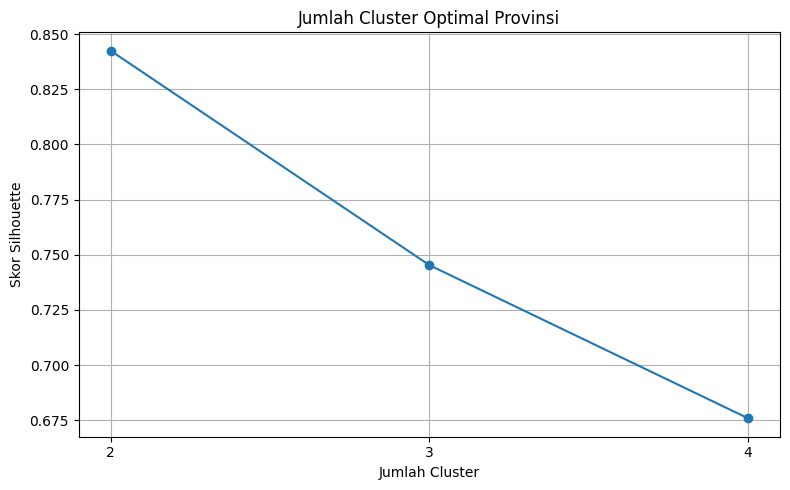

,jumlah_cluster,skor_silhouette,skor_silhouette_fmt
0,2,0.842493,"0,8425"
1,3,0.745294,"0,7453"
2,4,0.675860,"0,6759"


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load data
file_path = "exported_clustering.xlsx"
df = pd.read_excel(file_path)

# Pastikan kolom angka benar
df['total_score_prov'] = df['total_score_prov'].astype(float)

# Siapkan fitur untuk clustering
X = df[['total_score_prov']].values

# Simpan hasil
hasil = []

# Uji jumlah cluster optimal dari seluruh data provinsi
print("=== SKOR SILHOUETTE UNTUK SELURUH DATA PROVINSI ===")
for n_cluster in [2, 3, 4]:
    if len(df) > n_cluster:
        try:
            model = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
            label = model.fit_predict(X)
            score = silhouette_score(X, label)
            hasil.append({
                'jumlah_cluster': n_cluster,
                'skor_silhouette': score
            })
            print(f"{n_cluster} cluster -> skor silhouette: {score:.4f}")
        except Exception as e:
            print(f"{n_cluster} cluster -> Error: {str(e)}")
            hasil.append({
                'jumlah_cluster': n_cluster,
                'skor_silhouette': None
            })
    else:
        print(f"{n_cluster} cluster -> Data kurang")
        hasil.append({
            'jumlah_cluster': n_cluster,
            'skor_silhouette': None
        })

# Konversi ke DataFrame
df_hasil = pd.DataFrame(hasil)

# Buat plot
df_plot = df_hasil[df_hasil['skor_silhouette'].notnull()]

plt.figure(figsize=(8, 5))
plt.plot(df_plot['jumlah_cluster'], df_plot['skor_silhouette'], marker='o', linestyle='-')
plt.title('Jumlah Cluster Optimal Provinsi')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Skor Silhouette')
plt.xticks([2, 3, 4])
plt.grid(True)
plt.tight_layout()
plt.show()

# Tambahkan kolom format koma jika ingin ditampilkan sebagai tabel
df_hasil['skor_silhouette_fmt'] = df_hasil['skor_silhouette'].apply(
    lambda x: f"{x:.4f}".replace('.', ',') if isinstance(x, float) else x
)

# Tampilkan hasil akhir
df_hasil


d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


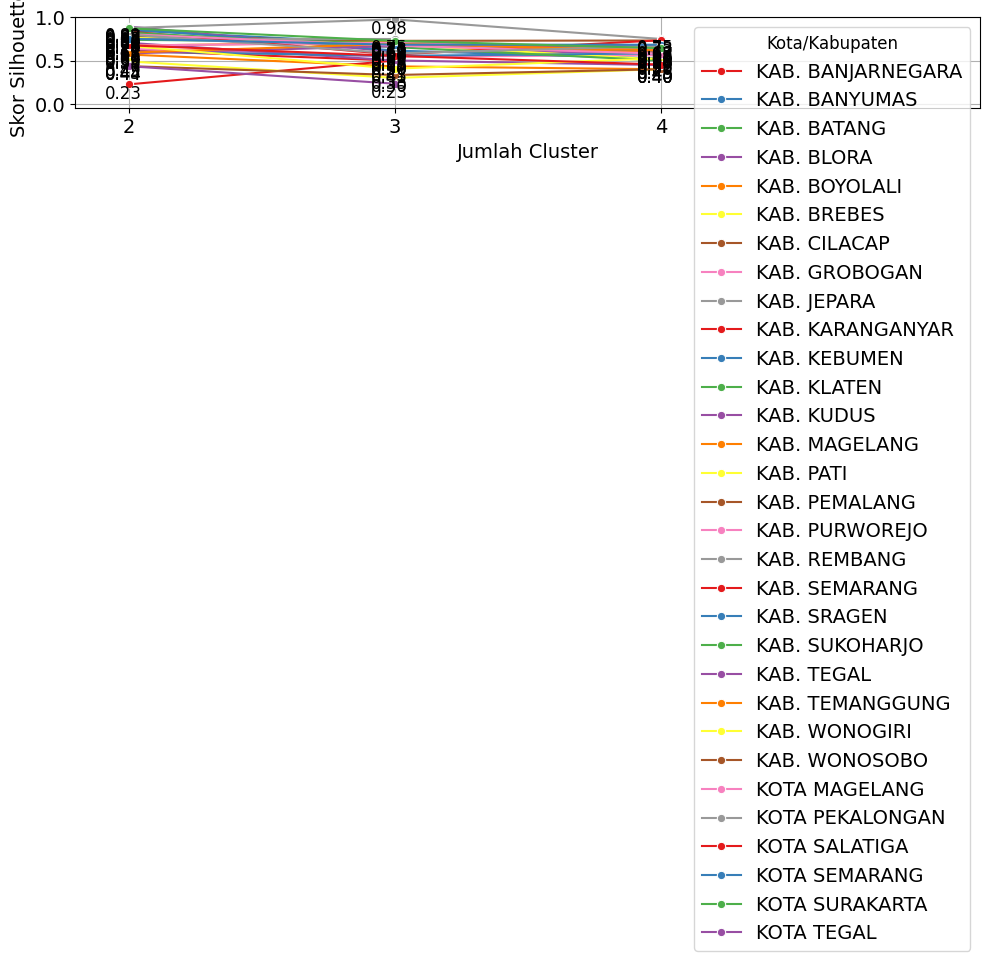

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data dari file Excel
file_path = "exported_clustering (22).xlsx"  
df = pd.read_excel(file_path)

# Pastikan kolom skor dalam bentuk float
df['skor_akhir_normalized'] = df['skor_akhir_normalized'].astype(float)

# Filter hanya provinsi D.I. Yogyakarta
df_diy = df[df['prop_sek'].str.upper() == 'PROV. JAWA TENGAH']

# Ambil daftar unik kota/kabupaten di DIY
daftar_kota_diy = df_diy['kota_sek'].unique()

# Inisialisasi list hasil
hasil = []

# Hitung silhouette score untuk n_cluster = 2, 3, 4, 5
for n_cluster in [2, 3, 4]:
    for kota in daftar_kota_diy:
        df_kota = df_diy[df_diy['kota_sek'] == kota]

        if len(df_kota) > n_cluster:
            try:
                X = df_kota[['skor_akhir_normalized']].values
                model = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
                label = model.fit_predict(X)
                score = silhouette_score(X, label)
                hasil.append({
                    'n_cluster': n_cluster,
                    'kota_sek': kota,
                    'silhouette_score': round(score, 4)
                })
            except Exception as e:
                hasil.append({
                    'n_cluster': n_cluster,
                    'kota_sek': kota,
                    'silhouette_score': None
                })
        else:
            hasil.append({
                'n_cluster': n_cluster,
                'kota_sek': kota,
                'silhouette_score': None
            })

# Konversi ke DataFrame
df_hasil = pd.DataFrame(hasil)

# Filter hanya nilai valid (bukan None)
df_valid = df_hasil[df_hasil['silhouette_score'].notnull()]

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_valid,
    x='n_cluster',
    y='silhouette_score',
    hue='kota_sek',
    marker='o',
    palette='Set1'
)

# Tambahkan label angka pada titik
for i in range(len(df_valid)):
    row = df_valid.iloc[i]
    plt.text(row['n_cluster'] + 0.05, row['silhouette_score'],
         f"{row['silhouette_score']:.2f}", fontsize=12,
         ha='right', va='top')  # ha: horizontal alignment, va: vertical
    


plt.xlabel("Jumlah Cluster", fontsize=14)
plt.ylabel("Skor Silhouette", fontsize=14)
plt.xticks([2, 3, 4], fontsize=14)
plt.yticks(fontsize=14)
plt.xlim(1.8, 5.2)
plt.ylim(-0.05, 1.0)
plt.grid(True)
plt.legend(title="Kota/Kabupaten", title_fontsize=12, fontsize=14)
plt.tight_layout()
plt.show()




In [41]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data dari file Excel
file_path = "exported_clustering (22).xlsx"  
df = pd.read_excel(file_path)

# Pastikan kolom skor dalam bentuk float
df['skor_akhir_normalized'] = df['skor_akhir_normalized'].astype(float)

# Filter hanya provinsi Jawa Tengah
df_jateng = df[df['prop_sek'].str.upper() == 'PROV. JAWA TENGAH']

# Ambil daftar unik kota/kabupaten di Jawa Tengah
daftar_kota = df_jateng['kota_sek'].unique()

# Inisialisasi list hasil
hasil = []

# Hitung silhouette score untuk n_cluster = 2, 3, 4
for n_cluster in [2, 3, 4]:
    for kota in daftar_kota:
        df_kota = df_jateng[df_jateng['kota_sek'] == kota]

        if len(df_kota) > n_cluster:
            try:
                X = df_kota[['skor_akhir_normalized']].values
                model = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
                label = model.fit_predict(X)
                score = silhouette_score(X, label)
                hasil.append({
                    'Kota': kota,
                    'Jumlah Cluster': n_cluster,
                    'Skor Silhouette': round(score, 4)
                })
            except:
                hasil.append({
                    'Kota': kota,
                    'Jumlah Cluster': n_cluster,
                    'Skor Silhouette': None
                })
        else:
            hasil.append({
                'Kota': kota,
                'Jumlah Cluster': n_cluster,
                'Skor Silhouette': None
            })

# Konversi ke DataFrame
df_hasil = pd.DataFrame(hasil)

# Urutkan agar lebih rapi
df_hasil = df_hasil.sort_values(by=['Kota', 'Jumlah Cluster'])

# Tampilkan sebagai tabel
print(df_hasil.to_string(index=False))


d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


             Kota  Jumlah Cluster  Skor Silhouette
KAB. BANJARNEGARA               2           0.6173
KAB. BANJARNEGARA               3           0.5000
KAB. BANJARNEGARA               4              NaN
    KAB. BANYUMAS               2           0.8492
    KAB. BANYUMAS               3           0.6938
    KAB. BANYUMAS               4           0.6026
      KAB. BATANG               2           0.6667
      KAB. BATANG               3              NaN
      KAB. BATANG               4              NaN
       KAB. BLORA               2           0.8938
       KAB. BLORA               3           0.6000
       KAB. BLORA               4           0.6000
    KAB. BOYOLALI               2           0.5703
    KAB. BOYOLALI               3           0.4333
    KAB. BOYOLALI               4           0.4000
      KAB. BREBES               2           0.4909
      KAB. BREBES               3           0.3000
      KAB. BREBES               4           0.4000
     KAB. CILACAP              

d:\Semester 8\pmb-kmeans-clustering\.venv\lib\site-packages\sklearn\base.py:1389: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Load data dari file Excel
file_path = "exported_clustering.xlsx"
df = pd.read_excel(file_path)

# Pastikan kolom skor dalam bentuk float
df['total_score_city'] = df['total_score_city'].astype(float)

# Filter hanya provinsi D.I. Yogyakarta
df_diy = df[df['prop_sek'].str.upper() == 'PROV. SULAWESI TENGGARA']

# Ambil daftar unik kota/kabupaten di DIY
daftar_kota_diy = df_diy['kota_sek'].unique()

# Inisialisasi list hasil
hasil = []

# Hitung silhouette score untuk n_cluster = 2, 3, 4, 5
for n_cluster in [2, 3, 4]:
    for kota in daftar_kota_diy:
        df_kota = df_diy[df_diy['kota_sek'] == kota]

        if len(df_kota) > n_cluster:
            try:
                X = df_kota[['skor_akhir_normalized']].values
                model = KMeans(n_clusters=n_cluster, random_state=42, n_init='auto')
                label = model.fit_predict(X)
                score = silhouette_score(X, label)
                hasil.append({
                    'n_cluster': n_cluster,
                    'kota_sek': kota,
                    'silhouette_score': round(score, 4)
                })
            except Exception as e:
                hasil.append({
                    'n_cluster': n_cluster,
                    'kota_sek': kota,
                    'silhouette_score': None
                })
        else:
            hasil.append({
                'n_cluster': n_cluster,
                'kota_sek': kota,
                'silhouette_score': None
            })

# Konversi ke DataFrame
df_hasil = pd.DataFrame(hasil)

# Filter hanya nilai valid (bukan None)
df_valid = df_hasil[df_hasil['silhouette_score'].notnull()]

# Plot line chart
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df_valid,
    x='n_cluster',
    y='silhouette_score',
    hue='kota_sek',
    marker='o',
    palette='Set1'
)

# Tambahkan label angka pada titik
for i in range(len(df_valid)):
    row = df_valid.iloc[i]
    plt.text(row['n_cluster'] + 0.05, row['silhouette_score'],
         f"{row['silhouette_score']:.2f}", fontsize=9,
         ha='right', va='top')  # ha: horizontal alignment, va: vertical
    


# Format plot
plt.title("Jumlah Cluster Optimal pada Skor Normalisasi Sekolah per Kota/Kabupaten di PROV. SULAWESI TENGGARA", fontsize=14, fontweight='bold')
plt.xlabel("Jumlah Cluster")
plt.ylabel("Skor Silhouette")
plt.xticks([2, 3, 4])
plt.xlim(1.8, 5.2)
plt.ylim(-0.05, 1.0)
plt.grid(True)
plt.legend(title="Kota/Kabupaten")
plt.tight_layout()

plt.show()


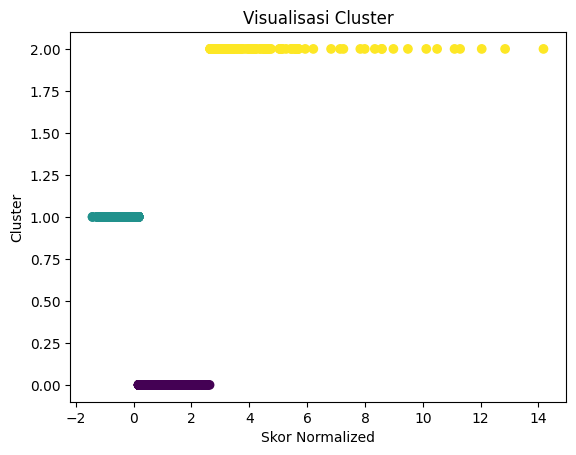

In [11]:
import matplotlib.pyplot as plt

plt.scatter(data['skor_normalized'], data['Cluster'], c=data['Cluster'], cmap='viridis')
plt.title('Visualisasi Cluster')
plt.xlabel('Skor Normalized')
plt.ylabel('Cluster')
plt.show()


In [1]:
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(data[['skor_normalized']])
    silhouette_avg = silhouette_score(data[['skor_normalized']], labels)
    print(f"Silhouette Coefficient untuk {n_clusters} clusters: {silhouette_avg:.4f}")


NameError: name 'KMeans' is not defined

In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load data dari file Excel
file_path = "hasil_clustering\clustering_semua_sekolah.xlsx"  # Pastikan file berada di direktori kerja Anda
data = pd.read_excel(file_path)

# Pastikan kolom skor_normalized dalam format numerik
data['skor_akhir'] = pd.to_numeric(data['skor_akhir'], errors='coerce')

# Pastikan ada data valid dalam skor_normalized
if data['skor_akhir'].isnull().all():
    raise ValueError("Kolom 'skor_akhir' tidak memiliki data valid untuk pengujian.")

# Lakukan clustering ulang (jika perlu), misalnya menggunakan KMeans
# Pilih jumlah cluster sesuai kebutuhan, misalnya 3
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(data[['skor_akhir']])

# Hitung Silhouette Coefficient
silhouette_avg = silhouette_score(data[['skor_akhir']], data['Cluster'])

# Tampilkan hasil
print(f"Silhouette Coefficient untuk clustering adalah: {silhouette_avg:.4f}")

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Coefficient untuk clustering adalah: 0.8683


In [2]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load data dari file Excel
file_path = "hasil_clustering/clustering_sekolah.xlsx"  # Pastikan file berada di direktori kerja Anda
df = pd.read_excel(file_path)
df['potensi'].value_counts()

potensi
Tidak Potensial    2423
Potensial             9
Name: count, dtype: int64

In [3]:
df.groupby('potensi')['skor_akhir'].describe()

,count,mean,std,min,25%,50%,75%,max
potensi,,,,,,,,
Potensial,9.0,2.442484,1.022303,1.319259,1.622699,2.148952,2.664072,4.471336
Tidak Potensial,2423.0,-0.512279,0.156197,-0.609439,-0.582323,-0.555206,-0.515306,1.196832


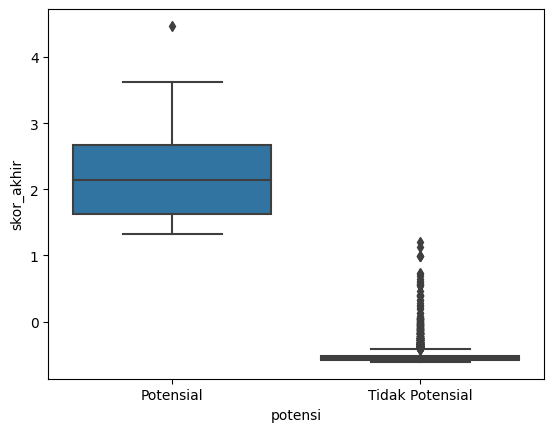

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='potensi', y='skor_akhir', data=df)
plt.show()


In [8]:
# Label cluster berdasarkan kolom "potensi"
cluster_labels = df['potensi'].replace({
    'Potensial': 0,
    'Tidak Potensial': 1
}).values

# Hitung silhouette score
silhouette_avg = silhouette_score(df[['skor_akhir']], cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9584336700908691


In [ ]:
import pandas as pd

# Load data dari file Excel
file_path = "uploaded_files/cleaned_data.xlsx"  # Pastikan file berada di direktori kerja Anda
df = pd.read_excel(file_path, engine="openpyxl")

# Cek jumlah nilai kosong per kolom
missing_values = df.isnull().sum()

# Cek jumlah data duplikat berdasarkan nama_sekolah
duplicates = df.duplicated(subset=['nama_sekolah']).sum()

# Menampilkan kolom yang digunakan
columns_used = df.columns.tolist()

# Print hasil pemeriksaan data
print("\n📌 **Bukti Data Sudah Bersih**")
print("--------------------------------------------------")

# Menampilkan daftar kolom yang digunakan dalam dataset
print("\n📂 **Kolom yang Digunakan dalam Dataset:**")
print(missing_values)




📌 **Bukti Data Sudah Bersih**
--------------------------------------------------

📂 **Kolom yang Digunakan dalam Dataset:**
tahun                            0
no_daftar                        0
alih_jalur                       0
tgl_daftar                       0
kodetest                         0
pilihan1                         0
pilihan2                         0
kelamin                          0
nama_sekolah                     0
npsn                          3130
alam_sek                         1
kelurahan_sek                   14
kecamatan_sek                   10
kota_sek                         0
kab_sek                       6874
prop_sek                         0
jadual                           0
agama                           10
terima                           0
nim                              0
tg_regis                      3353
batal                            0
sebab                         6948
tg_batal                      6947
Kategori Waktu Pendaftaran       0


In [ ]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler
# Load data dari file Excel
file_path = "uploaded_files/cleaned_data.xlsx"  # Pastikan file berada di direktori kerja Anda
df = pd.read_excel(file_path, engine="openpyxl")
# Agregasi data berdasarkan sekolah
df = df[df['nama_sekolah'] != 'UNKNOWN']
grouped_data = df.groupby(['prop_sek', 'kota_sek', 'nama_sekolah']).agg(
    total_pendaftar=('nama_sekolah', 'count'),
    total_lulus=('terima', lambda x: x[x != 'Tidak Lolos'].count()),
    total_regist=('nim', lambda x: x[x.notna() & (x != 'Tidak Registrasi')].count()),
    total_batal=('batal', 'sum'),
    awal=('tgl_daftar', lambda x: sum(x.dt.month.isin([1, 2, 3, 4])))
).reset_index()

# Simpan data asli sebelum normalisasi
grouped_data_original = grouped_data.copy()
# Bobot untuk setiap kriteria
bobot = {
    "total_regist": 0.3,
    "total_lulus": 0.2,
    "awal": 0.3,
    "total_pendaftar": 0.1,
    "total_batal": -0.3
}

# Hitung skor berbobot (tanpa normalisasi)
grouped_data['regist_weighted'] = grouped_data['total_regist'] * bobot['total_regist']
grouped_data['lulus_weighted'] = grouped_data['total_lulus'] * bobot['total_lulus']
grouped_data['awal_weighted'] = grouped_data['awal'] * bobot['awal']
grouped_data['pendaftar_weighted'] = grouped_data['total_pendaftar'] * bobot['total_pendaftar']
grouped_data['batal_weighted'] = grouped_data['total_batal'] * bobot['total_batal']

# Skor waktu (opsional, bisa dianggap sama dengan awal_weighted)
grouped_data['bobot_waktu'] = grouped_data['awal'] * bobot['awal']

# Hitung skor akhir total
grouped_data['skor_akhir'] = (
    grouped_data['total_regist'] * bobot['total_regist'] +
    grouped_data['total_lulus'] * bobot['total_lulus'] +
    grouped_data['bobot_waktu'] +
    grouped_data['total_pendaftar'] * bobot['total_pendaftar'] +
    grouped_data['total_batal'] * bobot['total_batal']
)

# Normalisasi ulang skor akhir jika diperlukan (opsional)
scaler = StandardScaler()
grouped_data['skor_akhir_normalized'] = scaler.fit_transform(grouped_data[['skor_akhir']])


# Tentukan kolom yang ingin ditampilkan
columns_to_display = [
    'nama_sekolah',
    'total_pendaftar', 'total_lulus', 'total_regist', 'total_batal', 'awal', 'skor_akhir',
]
# Tentukan kolom yang ingin ditampilkan
columns_to_display = [
    'prop_sek', 'kota_sek', 'nama_sekolah',
    'total_pendaftar', 'total_lulus', 'total_regist', 'total_batal', 'awal',
    'pendaftar_weighted', 'lulus_weighted','regist_weighted','batal_weighted', 'awal_weighted', 
    'skor_akhir', 'skor_akhir_normalized',
]

# Filter data untuk kota tertentu
kota_target = ['KAB. BENGKULU SELATAN', 'KAB. BENGKULU UTARA', 'KOTA BENGKULU', 'KAB. BANTUL', 'KAB. GUNUNG KIDUL', 'KAB. KULON PROGO', 'KAB. SLEMAN', 'KOTA YOGYAKARTA', 'KAB. BANYUMAS', 'KAB. KEBUMEN', 'KAB. KLATEN', 'KAB. MAGELANG', 'KAB. PATI', 'KAB. PURWOREJO', 'KAB. SEMARANG', 'KAB. SUKOHARJO', 'KAB. TEMANGGUNG', 'KOTA MAGELANG', 'KOTA SALATIGA', 'KOTA SEMARANG', 'KOTA SURAKARTA', 'KOTA BATU', 'KOTA MADIUN', 'KOTA MALANG', 'KOTA SURABAYA', 'KAB. KETAPANG', 'KAB. LANDAK', 'KAB. MELAWI', 'KAB. SANGGAU', 'KAB. SINTANG', 'KOTA PONTIANAK', 'KAB. ALOR', 'KAB. ENDE', 'KAB. FLORES TIMUR', 'KAB. MANGGARAI', 'KAB. SUMBA BARAT', 'KAB. SUMBA BARAT DAYA', 'KAB. SUMBA TENGAH', 'KAB. SUMBA TIMUR', 'KAB. TIMOR TENGAH SELATAN', 'KOTA KUPANG', 'KAB. BIAK NUMFOR', 'KAB. JAYAPURA', 'KAB. MERAUKE', 'KAB. MIMIKA', 'KAB. NABIRE', 'KOTA JAYAPURA', 'KAB. LUWU', 'KAB. TANA TORAJA', 'KAB. TORAJA UTARA', 'KOTA MAKASSAR', 'KOTA PALOPO']
filtered_data = grouped_data[grouped_data['kota_sek'].isin(kota_target)]
# Tampilkan semua baris
pd.set_option('display.max_rows', None)
filtered_data[columns_to_display].sort_values(by='skor_akhir', ascending=False).to_excel("output_tabel.xlsx", index=False)







KeyError: "['total_score_city', 'total_score_prov'] not in index"

In [30]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler

# Load data dari file Excel
file_path = "uploaded_files/cleaned_data.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Filter UNKNOWN
df = df[df['nama_sekolah'] != 'UNKNOWN']

# Agregasi data berdasarkan sekolah
grouped_data = df.groupby(['prop_sek', 'kota_sek', 'nama_sekolah']).agg(
    total_pendaftar=('nama_sekolah', 'count'),
    total_lulus=('terima', lambda x: x[x != 'Tidak Lolos'].count()),
    total_regist=('nim', lambda x: x[x.notna() & (x != 'Tidak Registrasi')].count()),
    total_batal=('batal', 'sum'),
    awal=('tgl_daftar', lambda x: sum(x.dt.month.isin([1, 2, 3, 4])))
).reset_index()

# Simpan data asli sebelum normalisasi
grouped_data_original = grouped_data.copy()

# Bobot untuk setiap kriteria
bobot = {
    "total_regist": 0.3,
    "total_lulus": 0.2,
    "awal": 0.3,
    "total_pendaftar": 0.1,
    "total_batal": -0.3
}

# Hitung skor berbobot
grouped_data['regist_weighted'] = grouped_data['total_regist'] * bobot['total_regist']
grouped_data['lulus_weighted'] = grouped_data['total_lulus'] * bobot['total_lulus']
grouped_data['awal_weighted'] = grouped_data['awal'] * bobot['awal']
grouped_data['pendaftar_weighted'] = grouped_data['total_pendaftar'] * bobot['total_pendaftar']
grouped_data['batal_weighted'] = grouped_data['total_batal'] * bobot['total_batal']
grouped_data['bobot_waktu'] = grouped_data['awal'] * bobot['awal']

# Skor akhir
grouped_data['skor_akhir'] = (
    grouped_data['regist_weighted'] +
    grouped_data['lulus_weighted'] +
    grouped_data['bobot_waktu'] +
    grouped_data['pendaftar_weighted'] +
    grouped_data['batal_weighted']
)

# Normalisasi skor akhir
scaler = StandardScaler()
grouped_data['skor_akhir_normalized'] = scaler.fit_transform(grouped_data[['skor_akhir']])

# Hitung total skor per kota
city_score = grouped_data.groupby(['prop_sek', 'kota_sek'])[['skor_akhir']].sum().reset_index()
city_score = city_score.rename(columns={'skor_akhir': 'total_skor_akhir_sekolah_per_kota'})
city_score['total_score_city_normalized'] = scaler.fit_transform(city_score[['total_skor_akhir_sekolah_per_kota']])
grouped_data = grouped_data.merge(city_score, on=['prop_sek', 'kota_sek'], how='left')

# Hitung total skor per provinsi
province_score = grouped_data.groupby(['prop_sek'])[['skor_akhir']].sum().reset_index()
province_score = province_score.rename(columns={'skor_akhir': 'total_skor_akhir_sekolah_per_provinsi'})
province_score['total_score_prov_normalized'] = scaler.fit_transform(province_score[['total_skor_akhir_sekolah_per_provinsi']])
grouped_data = grouped_data.merge(province_score, on='prop_sek', how='left')

# Kolom yang ditampilkan
columns_to_display = [
    'prop_sek', 'kota_sek', 'nama_sekolah',
    'total_pendaftar', 'total_lulus', 'total_regist', 'total_batal', 'awal',
    'pendaftar_weighted', 'lulus_weighted','regist_weighted','batal_weighted', 'awal_weighted',
    'skor_akhir', 'total_skor_akhir_sekolah_per_kota', 'total_skor_akhir_sekolah_per_provinsi', 'skor_akhir_normalized',
    'total_score_city_normalized', 'total_score_prov_normalized'
]

# Filter data kota target
kota_target = ['KAB. BENGKULU SELATAN', 'KAB. BENGKULU UTARA', 'KOTA BENGKULU',
               'KAB. BANTUL', 'KAB. GUNUNG KIDUL', 'KAB. KULON PROGO', 'KAB. SLEMAN',
               'KOTA YOGYAKARTA', 'KAB. BANYUMAS', 'KAB. KEBUMEN', 'KAB. KLATEN',
               'KAB. MAGELANG', 'KAB. PATI', 'KAB. PURWOREJO', 'KAB. SEMARANG',
               'KAB. SUKOHARJO', 'KAB. TEMANGGUNG', 'KOTA MAGELANG', 'KOTA SALATIGA',
               'KOTA SEMARANG', 'KOTA SURAKARTA', 'KOTA BATU', 'KOTA MADIUN',
               'KOTA MALANG', 'KOTA SURABAYA', 'KAB. KETAPANG', 'KAB. LANDAK',
               'KAB. MELAWI', 'KAB. SANGGAU', 'KAB. SINTANG', 'KOTA PONTIANAK',
               'KAB. ALOR', 'KAB. ENDE', 'KAB. FLORES TIMUR', 'KAB. MANGGARAI',
               'KAB. SUMBA BARAT', 'KAB. SUMBA BARAT DAYA', 'KAB. SUMBA TENGAH',
               'KAB. SUMBA TIMUR', 'KAB. TIMOR TENGAH SELATAN', 'KOTA KUPANG',
               'KAB. BIAK NUMFOR', 'KAB. JAYAPURA', 'KAB. MERAUKE', 'KAB. MIMIKA',
               'KAB. NABIRE', 'KOTA JAYAPURA', 'KAB. LUWU', 'KAB. TANA TORAJA',
               'KAB. TORAJA UTARA', 'KOTA MAKASSAR', 'KOTA PALOPO']

# Filter data berdasarkan kota
filtered_data = grouped_data[grouped_data['kota_sek'].isin(kota_target)]

# Urutkan berdasarkan propinsi, kota, dan skor (dari tinggi ke rendah)
filtered_data = filtered_data.sort_values(
    by=['prop_sek', 'kota_sek','total_score_prov_normalized', 'total_score_city_normalized', 'skor_akhir_normalized'], 
    ascending=[True, True, False, False, False]
).reset_index(drop=True)

# Simpan hasil
pd.set_option('display.max_rows', None)
filtered_data[columns_to_display].to_excel("output_tabel.xlsx", index=False)


In [ ]:
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import StandardScaler

# Load data dari file Excel
file_path = "uploaded_files/cleaned_data.xlsx"
df = pd.read_excel(file_path, engine="openpyxl")

# Filter UNKNOWN
df = df[df['nama_sekolah'] != 'UNKNOWN']

# Agregasi data berdasarkan sekolah
grouped_data = df.groupby(['prop_sek', 'kota_sek', 'nama_sekolah']).agg(
    total_pendaftar=('nama_sekolah', 'count'),
    total_lulus=('terima', lambda x: x[x != 'Tidak Lolos'].count()),
    total_regist=('nim', lambda x: x[x.notna() & (x != 'Tidak Registrasi')].count()),
    total_batal=('batal', 'sum'),
    awal=('tgl_daftar', lambda x: sum(x.dt.month.isin([1, 2, 3, 4])))
).reset_index()

# Simpan data asli sebelum normalisasi
grouped_data_original = grouped_data.copy()

# Bobot untuk setiap kriteria
bobot = {
    "total_regist": 0.3,
    "total_lulus": 0.2,
    "awal": 0.3,
    "total_pendaftar": 0.1,
    "total_batal": -0.3
}

# Hitung skor berbobot
grouped_data['regist_weighted'] = grouped_data['total_regist'] * bobot['total_regist']
grouped_data['lulus_weighted'] = grouped_data['total_lulus'] * bobot['total_lulus']
grouped_data['awal_weighted'] = grouped_data['awal'] * bobot['awal']
grouped_data['pendaftar_weighted'] = grouped_data['total_pendaftar'] * bobot['total_pendaftar']
grouped_data['batal_weighted'] = grouped_data['total_batal'] * bobot['total_batal']
grouped_data['bobot_waktu'] = grouped_data['awal'] * bobot['awal']

# Skor akhir
grouped_data['skor_akhir'] = (
    grouped_data['regist_weighted'] +
    grouped_data['lulus_weighted'] +
    grouped_data['bobot_waktu'] +
    grouped_data['pendaftar_weighted'] +
    grouped_data['batal_weighted']
)

# Normalisasi skor akhir
scaler = StandardScaler()
grouped_data['skor_akhir_normalized'] = scaler.fit_transform(grouped_data[['skor_akhir']])

# Hitung total skor per kota
city_score = grouped_data.groupby(['prop_sek', 'kota_sek'])[['skor_akhir']].sum().reset_index()
city_score = city_score.rename(columns={'skor_akhir': 'total_skor_akhir_sekolah_per_kota'})
city_score['total_score_city_normalized'] = scaler.fit_transform(city_score[['total_skor_akhir_sekolah_per_kota']])
grouped_data = grouped_data.merge(city_score, on=['prop_sek', 'kota_sek'], how='left')

# Hitung total skor per provinsi
province_score = grouped_data.groupby(['prop_sek'])[['skor_akhir']].sum().reset_index()
province_score = province_score.rename(columns={'skor_akhir': 'total_skor_akhir_sekolah_per_provinsi'})
province_score['total_score_prov_normalized'] = scaler.fit_transform(province_score[['total_skor_akhir_sekolah_per_provinsi']])
grouped_data = grouped_data.merge(province_score, on='prop_sek', how='left')

# Kolom yang ditampilkan
columns_to_display = [
    'prop_sek', 'kota_sek', 'nama_sekolah',
    'total_pendaftar', 'total_lulus', 'total_regist', 'total_batal', 'awal',
    'pendaftar_weighted', 'lulus_weighted','regist_weighted','batal_weighted', 'awal_weighted',
    'skor_akhir', 'total_skor_akhir_sekolah_per_kota', 'total_skor_akhir_sekolah_per_provinsi', 'skor_akhir_normalized',
    'total_score_city_normalized', 'total_score_prov_normalized'
]

# Filter data kota target
kota_target = ['KAB. BENGKULU SELATAN', 'KAB. BENGKULU UTARA', 'KOTA BENGKULU',
               'KAB. BANTUL', 'KAB. GUNUNG KIDUL', 'KAB. KULON PROGO', 'KAB. SLEMAN',
               'KOTA YOGYAKARTA', 'KAB. BANYUMAS', 'KAB. KEBUMEN', 'KAB. KLATEN',
               'KAB. MAGELANG', 'KAB. PATI', 'KAB. PURWOREJO', 'KAB. SEMARANG',
               'KAB. SUKOHARJO', 'KAB. TEMANGGUNG', 'KOTA MAGELANG', 'KOTA SALATIGA',
               'KOTA SEMARANG', 'KOTA SURAKARTA', 'KOTA BATU', 'KOTA MADIUN',
               'KOTA MALANG', 'KOTA SURABAYA', 'KAB. KETAPANG', 'KAB. LANDAK',
               'KAB. MELAWI', 'KAB. SANGGAU', 'KAB. SINTANG', 'KOTA PONTIANAK',
               'KAB. ALOR', 'KAB. ENDE', 'KAB. FLORES TIMUR', 'KAB. MANGGARAI',
               'KAB. SUMBA BARAT', 'KAB. SUMBA BARAT DAYA', 'KAB. SUMBA TENGAH',
               'KAB. SUMBA TIMUR', 'KAB. TIMOR TENGAH SELATAN', 'KOTA KUPANG',
               'KAB. BIAK NUMFOR', 'KAB. JAYAPURA', 'KAB. MERAUKE', 'KAB. MIMIKA',
               'KAB. NABIRE', 'KOTA JAYAPURA', 'KAB. LUWU', 'KAB. TANA TORAJA',
               'KAB. TORAJA UTARA', 'KOTA MAKASSAR', 'KOTA PALOPO']

# Filter data berdasarkan kota
filtered_data = grouped_data[grouped_data['kota_sek'].isin(kota_target)]

# Urutkan berdasarkan propinsi, kota, dan skor (dari tinggi ke rendah)
filtered_data = filtered_data.sort_values(
    by=['prop_sek', 'kota_sek','total_score_prov_normalized', 'total_score_city_normalized', 'skor_akhir_normalized'], 
    ascending=[True, True, False, False, False]
).reset_index(drop=True)

# Simpan hasil
pd.set_option('display.max_rows', None)
filtered_data[columns_to_display].to_excel("output_tabel.xlsx", index=False)


In [31]:
import pandas as pd
daftar_sekolah = [
    "SMAN 1 BENGKULU SELATAN",
    "SMAN 2 BENGKULU SELATAN",
    "SMAN 9 BENGKULU SELATAN",
    "SMAN 5 BENGKULU UTARA",
    "SMAN 1 BENGKULU UTARA",
    "SMAN 7 BENGKULU UTARA",
    "SMAS SINT CAROLUS",
    "SMAN 3 BENGKULU",
    "SMAN 7 BENGKULU",
    "SMA PANGUDI LUHUR SEDAYU",
    "SMKN 3 KASIHAN",
    "SMAN 1 BANGUNTAPAN",
    "SMAN 1 SEDAYU",
    "SMA BOPKRI BANGUNTAPAN",
    "SMA MUHHAMADIYAH AL MUJAHIDIN",
    "SMAN 2 PLAYEN",
    "SMAN 1 KARANGMOJO",
    "SMAN 1 RONGKOP",
    "SMAN 1 SENTOLO",
    "SMAN 1 TEMON",
    "SMAN 1 PENGASIH",
    "SMAN 1 KALIBAWANG",
    "SMAS KOLESE DE BRITTO",
    "SMAN 1 DEPOK",
    "SMAN 1 GODEAN",
    "SMAS BOPKRI 1",
    "SMAS BOPKRI 2",
    "SMAN 1 YOGYAKARTA",
    "SMAN 1 PURWOKERTO",
    "SMAN 1 BATURRADEN",
    "SMAN 1 PURWANEGARA",
    "SMAN 1 GOMBONG",
    "SMAN 1 KEBUMEN",
    "SMAN 1 KLIRONG",
    "SMAN 1 KLATEN",
    "SMAN 1 KARANGANOM",
    "SMAN 1 GRABAG",
    "SMAS BENTARA WACANA MUTILAN",
    "SMAS MARSUDIRINI MUNTILAN",
    "SMAS PANGUDI LUHUR VAN LITH MUNTILAN",
    "SMA YOS SUDARSO",
    "SMAN 1 JAKENAN",
    "SMA BOPKRI 3 PATI",
    "SMA PIUS BAKTI UTAMA",
    "SMAN 2 PURBALINGGA",
    "SMAN 1 PURWOREJO",
    "SMA SEDES SAPIENTIAE JAMBU",
    "SMA TAMAN MADYA AMBARAWA",
    "SMA VIRGO FIDELIS BAWEN",
    "SMAS KALAM KUDUS SUKOHARJO",
    "SMKN 1 SUKOHARJO",
    "SMAN 1 KARTASURA",
    "SMAN 1 TEMANGGUNG",
    "SMAN 2 TEMANGGUNG",
    "SMAN 3 TEMANGGUNG",
    "SMAS SHEKINAH TEMANGGUNG",
    "SMA HARAPAN BANGSA KALORAN",
    "SMAS TARAKANITA MAGELANG",
    "SMKS KRISTEN 1 MAGELANG",
    "SMAN 1 MAGELANG",
    "SMAN 2 SALATIGA",
    "SMAS 1 SIDOMUKTI",
    "SMAS SATYA WACANA",
    "SMAS KOLESE LOYOLA",
    "SMA SEDES SAPIENTIAE",
    "SMA SEMESTA",
    "SMAS REGINA PACIS SURAKARTA",
    "SMAS PANGUDI LUHUR SANTO YOSEF",
    "SMAN 3 SURAKARTA",
    "SMAN 1 SURAKARTA",
    "SMAS IMMANUEL BATU",
    "SMAS YOS SUDARSO BATU",
    "SMAN 2 BATU",
    "SMAN 1 BLITAR",
    "SMAN 1 MADIUN",
    "SMAN 2 MADIUN",
    "SMAN 3 TARUNA ANGKASA JAWA TIMUR",
    "SMAS SANTO ALBERTUS",
    "SMAS COR JESU",
    "SMAS FRATERAN",
    "SMAN 2 SURABAYA",
    "SMAN 22 SURABAYA",
    "SMAN 3 SURABAYA",
    "SMAN 5 SURABAYA",
    "SMAS CITRA BERKAT",
    "SMAS PANGUDI LUHUR SANTO YOHANES KETAPANG",
    "SMAN 1 MARAU",
    "SMAN 1 SANDAI",
    "SMAS MAKEDONIA NGABANG",
    "SMAN 1 NGABANG",
    "SMAN 1 SENGAH TEMILA",
    "SMA BHAKTI SETIA",
    "SMAN 1 NANGA PINOH",
    "SMAN 1 BELIMBING",
    "SMAN 1 TAYAN HULU",
    "SMAN 2 SANGGAU",
    "SMAS DON BOSCO SANGGAU",
    "SMAN 1 KEMBAYAN",
    "SMAS PANCA SETYA SINTANG",
    "SMAN 3 SINTANG",
    "SMKS BUDI LUHUR SINTANG",
    "SMAN 3 PONTIANAK",
    "SMAS GEMBALA BAIK PONTIANAK",
    "SMAS SANTO PAULUS PONTIANAK",
    "SMAS SANTO PETRUS PONTIANAK",
    "SMAN 1 KALABAHI",
    "SMAS 2 KALABAHI",
    "SMAN 1 ABAD",
    "SMAS SYURADIKARA",
    "SMAS FRATERAN NDAO",
    "SMAN 1 ENDE",
    "SMAS FRATERAN PODOR",
    "SMAS LAMAHOLOT",
    "SMAN 1 ADONARA TIMUR",
    "SMAN 1 LANGKE REMBONG",
    "SMAN 2 LANGKE REMBONG",
    "SMAN 2 RAHONG UTARA BEOKINA",
    "SMAN 1 WAIKABUBAK",
    "SMAS WAIKABUBAK",
    "SMKN 1 WAIKABUBAK",
    "SMAS SINT PIETER WAIKABUBAK",
    "SMAS SANTO THOMAS AQUINAS",
    "SMAS SEMINARI SINAR BUANA",
    "SMAS TAMAN SISWA",
    "SMAS WAIBAKUL",
    "SMAN 1 WAIBAKUL",
    "SMAN 1 UMBU RATU NGGAY BARAT",
    "SMAN 1 WAINGAPU",
    "SMAS ANDA LURI",
    "SMAN 1 HAHARU",
    "SMAN 1 SOE",
    "SMAN 1 AMANUBAN SELATAN",
    "SMAN 1 AMANUBAN TENGAH",
    "SMAN 3 KUPANG",
    "SMAS GIOVANNI KUPANG",
    "SMAS 2 KUPANG",
    "SMAN 1 BIAK",
    "SMAS SUB BYAKI FYADI BIAK",
    "SMA YPPK YOS SUDARSO BIAK",
    "SMAS RAJAWALI",
    "SMA YPPK ASISI SENTANI",
    "SMAN 1 KAUREH",
    "SMAN 1 SENTANI",
    "SMAN 1 MERAUKE",
    "SMAN 1 KIMAAM",
    "SMAN 2 MERAUKE",
    "SMAS SANTA MARIA",
    "SMAS KALAM KUDUS TIMIKA",
    "SMAN 1 MIMIKA",
    "SMA YPPK ADHI LUHUR",
    "SMAN 1 NABIRE",
    "SMAN 3 NABIRE",
    "SMAS YPPK TERUNA BAKTI",
    "SMAN 3 JAYAPURA",
    "SMAN 4 JAYAPURA",
    "SMAS KALAM KUDUS",
    "SMAN 12 LUWU",
    "SMAN 1 UNGGULAN KAMANRE",
    "SMAN 4 LUWU",
    "SMAN 1 TANA TORAJA",
    "SMAN 1 MAKALE",
    "SMAN 2 TANA TORAJA",
    "SMAS BARANA",
    "SMAN 1 TORAJA UTARA",
    "SMAN 2 TORAJA UTARA",
    "SMA FRATER MAKASSAR",
    "SMAN 1 MAKASSAR",
    "SMAN 17 MAKASSAR",
    "SMAN 2 MAKASSAR",
    "SMAN 21 MAKASSAR",
    "SMAN 1 PALOPO",
    "SMAN 3 PALOPO",
    "SMAS FRATER PALOPO"
]

# Baca data dari file
df = pd.read_excel("output_tabel.xlsx")


# Filter berdasarkan daftar sekolah
filtered_df = df[df['nama_sekolah'].isin(daftar_sekolah)]

# Tampilkan hasil
filtered_df.to_excel("filtered_sekolah.xlsx", index=False)

In [2]:
import pandas as pd

# Load data dari file Excel
file_path = "uploaded_files/cleaned_data.xlsx"  # Pastikan file berada di direktori kerja Anda
df = pd.read_excel(file_path, engine="openpyxl")

# Group by 'nama_sekolah' dan 'prop_sek' dan hitung ukuran grup
grouped = df.groupby(['nama_sekolah', 'prop_sek']).size().reset_index(name='len')

# Periksa duplikasi
duplicates = grouped[grouped['len'] > 1]

# Tampilkan hasil pemeriksaan menggunakan print
print(f"Total unique schools: {grouped.shape[0]}")
print(f"Total duplicate schools: {duplicates.shape[0]}")
print("Duplicate schools:")
print(duplicates.to_string(index=False))



Total unique schools: 2248
Total duplicate schools: 999
Duplicate schools:
                                        nama_sekolah                        prop_sek  len
                         BINA BANGSA SCHOOL SEMARANG               Prov. Jawa Tengah    2
                    ESCOLA SANTA MADALENA DE CANOSSA                     Luar Negeri    3
    ESKOLA SEKUNDARIA GERAL LERE ANAN TIMUR LOSPALOS                     Luar Negeri    3
                           MANADO INDEPENDENT SCHOOL                  Sulawesi Utara    3
         MINISTERIO DA EDUCACAO JUVENTUDE E DESPORTO                     Luar Negeri    2
                               PKBM GENERASI MERDEKA           Prov. D.I. Yogyakarta    2
                        PKBM PELANGI ABADI NUSANTARA           Prov. D.I. Yogyakarta    2
                                   PKBM REKSONEGARAN           Prov. D.I. Yogyakarta    2
                                  PKBM WIJAYA KUSUMA           Prov. D.I. Yogyakarta    2
                       SE

In [19]:
import pandas as pd
from geopy.geocoders import ArcGIS
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import json
import os
import re
# from rapidfuzz import process, fuzz
from datetime import datetime
from scipy.spatial import ConvexHull, QhullError
from folium.plugins import MarkerCluster
from fuzzywuzzy import process, fuzz
import numpy as np
from pathlib import Path

# Data referensi program studi
prodi_reference = {
    "01": "Filsafat Keilahian",
    "11": "Manajemen",
    "12": "Akuntansi",
    "13": "Magister Manajemen",
    "21": "Arsitektur",
    "22": "Informatika",
    "23": "Sistem Informasi",
    "24": "Desain Produk",
    "31": "Biologi",
    "41": "Pendidikan Dokter",
    "50": "Magister Filsafat Keilahian",
    "57": "S3 Ilmu Teologi",
    "59": "Matrikulasi Filsafat Keilahian",
    "63": "Magister Arsitektur",
    "81": "Pendidikan Bahasa Inggris",
    "82": "Studi Humanitas",
}

wilayah_reference = {
"D.I. Yogyakarta": ["Kab. Kulonprogo", "Kab. Bantul", "Kab. Gunungkidul", "Kab. Sleman", "Kodya Yogyakarta"],
"Bali": ["Kab. Jembrana", "Kab. Tabanan", "Kab. Badung", "Kab. Gianjar", "Kab. Klungkung", "Kab. Bangli", "Kab. Karangasem", "Kab. Buleleng", "Kodya Denpasar"],
"Bangka Belitung": ["Kab. Bangka", "Kab. Belitung", "Kab. Bangka Tengah", "Kab. Bangka Barat", "Kab. Bangka Selatan", "Kab. Belitung Timur", "Kota Pangkal Pinang"],
"Banten": ["Kab. Serang", "Kab. Pandeglang", "Kab. Lebak", "Kab. Tangerang", "Kodya Cilegon", "Kodya Tangerang", "Kota Serang", "Kota Tangerang Selatan"],
"Bengkulu": ["Kab. Bengkulu Selatan", "Kab. Rejanglebong", "Kab. Bengkulu Utara", "Kodya Bengkulu", "Kab. Muko-muko", "Kab. Kepahiang", "Kab. Lebong", "Kab. Kaur", "Kab. Seluma", "Kab. Bengkulu Tengah"],
"D.I. Aceh": ["Kab. Aceh Selatan", "Kab. Aceh Tenggara", "Kab. Aceh Timur", "Kab. Aceh Tengah", "Kab. Aceh Barat", "Kab. Aceh Besar", "Kab. Piedi", "Kab. Aceh Utara", "Kodya Banda Aceh", "Kodya Sabang", "Kab. Bireuen", "Kab. Simeuleu", "Kab. Singkil", "Kab. Langsa", "Kab. Aceh Barat Daya", "Kab. Gayo Lues", "Kab. Aceh Jaya", "Kab. Nagan Raya", "Kab. Aceh Tamiang", "Kotif. Aceh Timur", "Kotif. Lhok Seumawe", "Kab. Bener Meriah", "Kab. Pidie Jaya", "Kota Subulussalam"],
"D.K.I Jakarta": ["Jakarta Selatan", "Jakarta Timur", "Jakarta Pusat", "Jakarta Barat", "Jakarta Utara", "Kab. Kepulauan Seribu"],
"Gorontalo": ["Kab. Boalemo", "Kab. Gorontalo", "Kodya Gorontalo", "Kab. Pohuwato", "Kab. Bone Bolango", "Kab. Gorontalo Utara"],
"Jambi": ["Kab. Kerinci", "Kab. Sarulangun", "Kab. Batanghari", "Kab. Tanjung Jabung Timur", "Kab. Muaro Jambi", "Kodya Jambi", "Kab. Bungo", "Kab. Merangin", "Kab. Tebo", "Kab. Tanjung Jabung Barat", "Kota Sungai Penuh"],
"Jawa Barat": ["Kab. Bogor", "Kab. Sukabumi", "Kab. Cianjur", "Kab. Bandung", "Kab. Garut", "Kab. Tasikmalaya", "Kab. Ciamis", "Kab. Kuningan", "Kab. Cirebon", "Kab. Majalengka", "Kab. Sumedang", "Kab. Indramayu", "Kab. Subang", "Kab. Purwakarta", "Kab. Karawang", "Kab. Bekasi", "Kodya Bogor", "Kodya Sukabumi", "Kodya Bandung", "Kodya Cirebon", "Kodya Depok", "Kota Banjar", "Kab. Bandung Barat", "Kota Bekasi", "Kota Cimahi", "Kota Tasikmalaya", "Kab. Pangandaran"],
"Jawa Tengah": ["Kab. Cilacap", "Kab. Banyumas", "Kab. Purbalingga", "Kab. Banjarnegara", "Kab. Kebumen", "Kab. Purworejo", "Kab. Wonosobo", "Kab. Magelang", "Kab. Boyolali", "Kab. Klaten", "Kab. Sukoharjo", "Kab. Wonogiri", "Kab. Karanganyar", "Kab. Sragen", "Kab. Grobogan", "Kab. Blora", "Kab. Rembang", "Kab. Pati", "Kab. Kudus", "Kab. Jepara", "Kab. Demak", "Kab. Semarang", "Kab. Temanggung", "Kab. Kendal", "Kab. Batang", "Kab. Pekalongan", "Kab. Pemalang", "Kab. Tegal", "Kab. Brebes", "Kodya Magelang", "Kodya Surakarta", "Kodya Salatiga", "Kodya Semarang", "Kodya Pekalongan", "Kodya Tegal"],
"Jawa Timur": ["Kab. Pacitan", "Kab. Ponorogo", "Kab. Trenggalek", "Kab. Tulungagung", "Kab. Blitar", "Kab. Kediri", "Kab. Malang", "Kab. Lumajang", "Kab. Jember", "Kab. Banyuwangi", "Kab. Bondowoso", "Kab. Situbondo", "Kab. Probolinggo", "Kab. Pasuruan","Kab. Sidoarjo", "Kab. Mojokerto", "Kab. Jombang", "Kab. Madiun", "Kab. Nganjuk", "Kab. Magetan", "Kab. Ngawi", "Kab. Bojonegoro", "Kab. Tuban", "Kab. Lamongan", "Kab. Gresik", "Kab. Bangkalan", "Kab. Sampang", "Kab. Pamekasan", "Kab. Sumenep", "Kodya Kediri", "Kodya Blitar", "Kodya Malang", "Kodya Probolinggo", "Kodya Pasuruan", "Kodya Mojokerto", "Kodya Madiun", "Kodya Surabaya", "Kab. Magetan", "Kab. Bangkalan", "Kota Batu"],
"Kalimantan Barat" : ["Kab. Sambas", "Kab. Pontianak", "Kab. Sanggau", "Kab. Ketapang", "Kab. Sintang", "Kab. Kapuas Hulu", "Kodya Pontianak", "Kab. Bengkayang", "Kab. Landak", "Kab. Sekadau", "Kab. Melawi", "Kab. Kayong Utara", "Kab. Kubu Raya", "Kota Singkawang", "Kab. Mempawah"],
"Kalimantan Selatan" : ["Kab. Taman Laut", "Kab. Kota Baru", "Kab. Banjar", "Kab. Barito Kuala", "Kab. Tapin/Tapian", "Kab. Hulu Sei Selatan", "Kab. Hulu Sei Tengah", "Kab. Hulu Sei Utara", "Kab. Tabalong", "Kodya Banjarmasin", "Kab. Balangan", "Kab. Tanah Bumbu", "Kota Banjarbaru"],
"Kalimantan Tengah" :  ["Kab. Kota Waringin Barat", "Kab. Kota Waringin Timur", "Kab. Katingan", "Kab. Kapuas", "Kab. Barito Selatan", "Kab. Barito Timur", "Kab. Barito Utara", "Kab. Gunung Mas", "Kab. Murung Raya", "Kab. Seruyan", "Kodya Palangkaraya", "Kab. Katingan", "Kab. Seruyan", "Kab. Sukamara", "Kab. Lamandau", "Kab. Gunung Mas", "Kab. Pulau Pisau", "Kab. Murung Raya", "Kab. Barito Timur", "Kab. Kutai Timur"],
"Kalimantan Timur" :   ["Kab. Pasir", "Kab. Kutai", "Kab. Berau", "Kab. Bulungan", "Kodya Balikpapan", "Kodya Samarinda", "Kab. Kutai Barat", "Kab. Malinau", "Kab. Nunukan", "Kab. Penajam Paser Utr", "Kodya Bontang", "Kodya Tarakan", "Kab. Kutai Kartanegara", "Kab. Kutai Barat", "Kab. Kutai Timur", "Kab. Tana Tidung", "Kab. Mahakam Ulu"],
"Kalimantan Utara" :  ["Kab. Bulungan", "Kab. Malinau", "Kab. Nunukan", "Kab. Tana Tidung", "Kota Tarakan"],
"Kepulauan Riau" :  ["Kab. bangka", "Kab. Belitung", "Kodya Pangkal Pinang", "Kab. Bangka Tengah", "Kab. Bangka Barat", "Kab. Bangka Selatan", "Kab. Belitung Timur"],
"Lampung" :  ["Kab. Lampung Selatan", "Kab. Lampung Tengah", "Kab. Lampung Utara", "Kodya Tanjung Karang", "Kab. Lampung Timur", "Kab. Lampung Barat", "Kab. Tulang Bawang", "Kab. Way Kanan", "Kodya Bandar Lampung", "Kodya Metro", "Kab. Pesawaran", "Kab. Pringsewu", "Kab. Mesuji", "Kab. Tulang Bawang Barat", "Kab. Pesisir Barat", "Kab. Tanggamus"],
"Luar Negeri" : ["Timor Leste", "Malaysia", "Lainnya"],
"Maluku" : ["Kab. Maluku Tenggara", "Kab. Maluku Tengah", "Kab. Halmahera Tengah", "Kab. Maluku Utara", "Kodya Ambon", "Kab. Maluku Teng Barat", "Kab. Buru", "Kab. Seram Bagian Barat", "Kab. Seram Bagian Timur", "Kab. Kepulauan Aru", "Kab. Maluku Barat Daya", "Kab. Buru Selatan", "Kota Tual", "Kab.Kepulauan Tanimbar"],
"Maluku Utara" : ["Kab. Maluku Utara", "Kab. Pulau Sula", "Kab. Halmahera Tengah", "Kab. Halmahera Selatan", "Kab. Halmahera Utara", "Kab. Halmahera Timur", "Kota Ternate", "Kota Tidore Kepulauan", "Kab. Halmahera Barat", "Kab. Kepulauan Morotai", "Pulau Taliabu"],
"Nusa Tenggara Barat" :  ["Kab. Lombok Barat", "Kab. Lombok Tengah", "Kab. Lombok Timur", "Kab. Sumbawa", "Kab. Dompu", "Kab. Bima", "Kab. Mataram", "Kab. Sumbawa Barat", "Kab. Lombok Utara", "Kota Mataram", "Kota Bima"],
"Nusa Tenggara Timur" :  ["Kab. Sumba Barat", "Kab. Sumba Timur", "Kab. Kupang", "Kab. Timor Tengah Selatan", "Kab. Timor Tengah Utara", "Kab. Belu", "Kab. Alor", "Kab. Flores Timur", "Kab. Sikka", "Kab. Ende", "Kab. Ngade", "Kab. Manggarai", "Kab. Lembata", "Kodya Kupang", "Kab. Rote-Ndao", "Kab. Manggarai Barat", "Kab. Nagekeo", "Kab. Sumba Tengah", "Kab. Sumba Barat Daya", "Kab. Manggarai Timur", "Kab. Sabu Raijua", "Kab. Malaka"],
"Papua Barat": [
    "Kab. Fak Fak", "Kab. Manokwari", "Kab. Sorong", "Kota Sorong", "Kab. Kaimana", 
    "Kab. Teluk Wondama", "Kab. Teluk Bintuni", "Kab. Sorong Selatan", "Kab. Kep. Raja Ampat", 
    "Kab. Tambrauw", "Kab. Maybrat", "Kab. Pegunungan Arfak", "Kab. Manokwari Selatan"
],
"Papua Timur": [
    "Kab. Jayapura", "Kab. Jayawijaya", "Kab. Merauke", "Kab. Puncak Jaya", "Kodya Jayapura"
],
"Prov. Kepulauan Riau": [
    "Kab. Bintan", "Kab. Karimun", "Kab. Natuna", "Kab. Lingga", "Kab. Kep. Anambas", 
    "Kota Batam", "Kota Tanjung Pinang"
],
"Prov. Papua": [
    "Kab. Biak Numfor", "Kab. Mimika", "Kab. Nabire", "Kab. Panial", "Kab. Yapen Waropen", 
    "Kab. Jayapura", "Kab. Yapen Waropen", "Kab. Merauke", "Kab. Jayawijaya", "Kab. Paniai", 
    "Kab. Puncak Jaya", "Kab. Boven Digoel", "Kab. Mappi", "Kab. Asmat", "Kab. Yahukimo", 
    "Kab. Pegunungan Bintang", "Kab. Tolikara", "Kab. Sarmi", "Kab. Keerom", "Kab. Waropen", 
    "Kab. Supiori", "Kab. Memberamo Raya", "Kab. Nduga Tengah", "Kab. Lanny Jaya", 
    "Kab. Mamberamo Tengah", "Kab. Yalimo", "Kab. Puncak", "Kab. Dogiyai", "Kab. Deiyai", 
    "Kab. Intan Jaya", "Kota Jayapura"
],
"Riau": [
    "Kab. Indragiri Ulu", "Kab. Indragiri Hilir", "Kab. Kepulauan Riau", "Kab. Kampar", 
    "Kab. Bengkalis", "Kodya Pekanbaru", "Kodya Batam", "Kab. Kuantan Singingi", "Kab. Pelalawan", 
    "Kab. Siak", "Kab. Rokan Hilir", "Kab. Rokan Hulu", "Kab. Karimun", "Kab. Kepulauan Riau", 
    "Kab. Kota Batam", "Kab. Natuna", "Kab. Tanjung Pinang", "Kodya Dumai", "Kodya Tanjung Pinang", 
    "Kab. Kep. Meranti"
],
"Sulawesi Barat": [
    "Kab. Mamuju", "Kab. Mamuju Utara", "Kab. Polewali Mandar", "Kab. Mamasa", "Kab. Majene", 
    "Kab. Pasangkayu", "Kab. Mamuju Tengah"
],
"Sulawesi Selatan": [
    "Kab. Selayar", "Kab. Bulu Kumba", "Kab. Bantaeng", "Kab. Jeneponto", "Kab. Takalar", 
    "Kab. Gowa", "Kab. Sinjai", "Kab. Bone", "Kab. Maros", "Kab. Pangkajene", "Kab. Barru", 
    "Kab. Soppeng", "Kab. Wajo", "Kab. Sidrap", "Kab. Pinrang", "Kab. Enrekang", "Kab. Luwu", 
    "Kab. Tana Toraja", "Kab. Olewali Mamasa", "Kab. Majene", "Kab. Mamuju", "Kodya Ujungpandang", 
    "Kodya Pare-pare", "Kab. Luwu Utara", "Kota Watampone", "Kab. Tana Toraja Utara", 
    "Kab. Luwu Timur", "Kota Palopo"
],
"Sulawesi Tengah": [
    "Kab. Luwuk/Banggai", "Kab. Poso", "Kab. Donggala", "Kab. Buol", "Kab. Toli-Toli", 
    "Kab. Banggai Kepulauan", "Kab. Morowali", "Kab. Toli Toli", "Kodya Palu", "Kab. Banggai", 
    "Kab. Parigi Moutong", "Kab. Tojo Una-Una", "Kab. Sigi", "Kab. Banggai Laut", "Kab. Morowali Utara"
],
"Sulawesi Tenggara": [
    "Kabupaten Bombana", "Kabupaten Buton", "Kabupaten Buton Selatan", "Kabupaten Buton Tengah", 
    "Kabupaten Buton Utara", "Kabupaten Kolaka", "Kabupaten Kolaka Timur", "Kabupaten Kolaka Utara", 
    "Kabupaten Konawe", "Kabupaten Konawe Kepulauan", "Kabupaten Konawe Selatan", "Kabupaten Konawe Utara", 
    "Kabupaten Muna", "Kabupaten Muna Barat", "Kabupaten Wakatobi", "Kota Bau-Bau", "Kota Kendari"
],
"Sulawesi Utara": [
    "Kab. Gorontalo", "Kab. Bolaang Mongondow", "Kab. Minahasa", "Kab. Kepulauan Talaud", "Kodya Gorontalo", 
    "Kodya Manado", "Kab. Boalemo", "Kodya Bitung", "Kab. Kepulauan Sangihe", "Kab. Minahasa Selatan", 
    "Kab. Minahasa Utara", "Kab. Bolaang Mongondow Utara", "Kab. Siau Tagulandang Biaro", "Kab. Minahasa Tenggara", 
    "Kab. Bolaang Mongondow Timur", "Kab. Bolaang Mongondow Selatan", "Kota Tomohon", "Kota Kotamobagu"
],
"Sumatra Barat": [
    "Kab. Pesisir Selatan", "Kab. Solok", "Kab. Sawah Lunto", "Kab. Tanah Datar", "Kab. Padang Pariaman", 
    "Kab. Agam", "Kab. Limapuluh Kota", "Kab. Pasaman", "Kodya Padang", "Kodya Solok", "Kodya Sawah Lunto", 
    "Kodya Padang Panjang", "Kodya Bukittinggi", "Kodya Payakumbuh", "Kab. Kep. Mentawai", "Kab. Solok Selatan", 
    "Kab. Dharmas Raya", "Kab. Pasaman Barat", "Kota Pariaman", "Kab. Sijunjung"
],
"Sumatra Selatan": [
    "Kab. Ogan Komering Ulu", "Kab. Ogan Komering Ilir", "Kab. Muara Enim", "Kab. Lahat", "Kab. Musi Rawas", 
    "Kab. Musi Banyu Asin", "Kab. Bangka", "Kab. Belitung", "Kodya Palembang", "Kodya Pangkal Pinang", 
    "Kab. Banyuasin", "Kab. Ogan Komering Ulu Timur", "Kab. Ogan Komering Ulu Sel.", "Kab. Ogan Ilir", 
    "Kab. Empat Lawang", "Kota Prabumulih", "Kota Lubuk Linggau", "Kota Pagar Alam", 
    "Kab. Penukal Abab Lematang Ilir", "Kab. Musi Rawas Utara"
],
"Sumatra Utara": [
    "Kab. Nias", "Kab. Tapanuli Selatan", "Kab. Tapanuli Tengah", "Kab. Tapanuli Utara", "Kab. Labuhan Batu", 
    "Kab. Asahan", "Kab. Simalungun", "Kab. Dairi", "Kab. Karo", "Kab. Deli Serdang", "Kab. Langkat", 
    "Kodya Sibolga", "Kodya Tanjung Balai", "Kodya P. Siantar", "Kodya Tebingtinggi", "Kodya Medan", 
    "Kodya Binjai", "Kab. Mandailing Natal", "Kab. Toba Samosir", "Kota Rantau Prapat", "Kab. Nias Selatan", 
    "Kab. Pakpak Bharat", "Kab. Humbang Hasundutan", "Kab. Samosir", "Kab. Serdang Bedagai", "Kab. Batu Bara", 
    "Kab. Padang Lawas Utara", "Kab. Padang Lawas", "Kab. Labuhanbatu Utara", "Kab. Labuhanbatu Selatan", 
    "Kab. Nias Barat", "Kota Padang Sidempuan", "Kota Gunung Sitoli", "Kab. Nias Utara"
]

}

# Misalnya data Anda sudah dimuat ke dalam DataFrame
df = pd.read_excel('calon_mahasiswa_baru_2020-2024.xlsx')
# Drop rows where 'nama_sekolah' is NaN (if any)
df = df.dropna(subset=["nama_sekolah"]).reset_index(drop=True)
    
# Make sure all values in 'nama_sekolah' are strings
df['nama_sekolah'] = df['nama_sekolah'].astype(str)
    
# Remove unwanted characters such as '-' and ':'
df['nama_sekolah'] = df['nama_sekolah'].str.upper()  # Ubah menjadi huruf kapital
df['nama_sekolah'] = df['nama_sekolah'].str.replace(r'\s+', ' ', regex=True)  # Hapus spasi ganda
df['nama_sekolah'] = df['nama_sekolah'].str.strip()  # Menghapus spasi di awal dan akhir

    # Trim whitespaces from all string columns
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Replace empty strings with NaN
df.replace("", np.nan, inplace=True)  # Replace empty strings with NaN

# Drop rows where 'nama_sekolah' is NaN (if any)
df = df.dropna(subset=["nama_sekolah"]).reset_index(drop=True)

# Make sure all values in 'nama_sekolah' are strings
df['nama_sekolah'] = df['nama_sekolah'].astype(str)

# Remove unwanted characters such as '-' and ':'
df['nama_sekolah'] = df['nama_sekolah'].str.replace(r'[-:]', '', regex=True)

# Replace any remaining empty string entries in 'nama_sekolah' with NaN and drop them
df['nama_sekolah'] = df['nama_sekolah'].replace("", np.nan)
df = df.dropna(subset=["nama_sekolah"]).reset_index(drop=True)


df["pilihan1"] = df["pilihan1"].apply(lambda x: f"{int(x):02}" if pd.notna(x) else None)
df["pilihan2"] = df["pilihan2"].apply(lambda x: f"{int(x):02}" if pd.notna(x) else None)

# Memetakan kode prodi di kolom 'pilihan1' dan 'pilihan2' ke nama prodi
df["pilihan1"] = df["pilihan1"].map(prodi_reference).fillna("Tidak Memilih")
df["pilihan2"] = df["pilihan2"].map(prodi_reference).fillna("Tidak Memilih")

df["terima"] = df["terima"].apply(lambda x: f"{int(x):02}" if pd.notna(x) else None)
df["terima"] = df["terima"].map(prodi_reference).fillna("Tidak Lolos")


# Isi nilai kosong pada kolom 'nim'
df["nim"] = df["nim"].fillna("Tidak Registrasi").astype(str)
# Isi nilai kosong pada kolom 'kelamin'
df["kelamin"] = df["kelamin"].fillna("Tidak Diketahui").astype(str)


# Mengisi nilai kosong pada kolom `kota_sek` dengan nilai dari kolom `kab_sek`
df['kota_sek'] = df['kota_sek'].fillna(df['kab_sek'])
# Handle missing 'prop_sek' and 'kota_sek' based on the same 'nama_sekolah'
df['prop_sek'] = df.groupby('nama_sekolah')['prop_sek'].transform(lambda x: x.ffill().bfill())
df['kota_sek'] = df.groupby('nama_sekolah')['kota_sek'].transform(lambda x: x.ffill().bfill())

# Mengganti "D.I. Yogyakarta" dengan "Kodya Yogyakarta" pada kolom kota_sek
df['kota_sek'] = df['kota_sek'].replace("D.I. Yogyakarta", "Kodya Yogyakarta")
# Fungsi untuk memeriksa apakah kota_sek sesuai dengan prop_sek
def validate_kota_sek(row):
    prop_sek = row['prop_sek']
    kota_sek = row['kota_sek']
    kab_sek = row['kab_sek']
    
    # Cek apakah prop_sek ada di wilayah_reference
    if prop_sek in wilayah_reference:
        valid_kota = wilayah_reference[prop_sek]
        
        # 1. Cek apakah kota_sek sesuai dengan prop_sek
        if kota_sek in valid_kota:
            return kota_sek
        
        # 2. Jika kota_sek tidak cocok, cek apakah kab_sek cocok dengan prop_sek
        if kab_sek in valid_kota:
            # Ganti kota_sek dengan kab_sek jika kab_sek cocok
            return kab_sek
        
        # 3. Jika keduanya tidak cocok, kita bisa memilih kota pertama yang valid atau memberi nilai "Kota Tidak Dikenal"
        return valid_kota[0]  # atau bisa menggunakan "Invalid Data" atau nilai lain yang sesuai
    
    return kota_sek  # Jika prop_sek tidak ada dalam wilayah_reference

# Terapkan fungsi validasi pada setiap baris
df['kota_sek'] = df.apply(validate_kota_sek, axis=1)

df = df.drop_duplicates(subset=['no_daftar'])
df['tgl_daftar'] = pd.to_datetime(df['tgl_daftar'], errors='coerce', dayfirst=True)


# Menghitung jumlah kemunculan nama sekolah 'SMA N 1 SENTOLO' setelah distandarisasi
count_sma_sento = df[df['nama_sekolah'] == 'SMA N 1 SENTOLO'].shape[0]

# Menampilkan jumlah kemunculan
print(f"SMA N 1 SENTOLO muncul {count_sma_sento} kali dalam dataset.")




SMA N 1 SENTOLO muncul 2 kali dalam dataset.


In [20]:
import pandas as pd
from fuzzywuzzy import fuzz, process

# Fungsi untuk mencocokkan nama sekolah dengan yang terbaik
def get_best_match(name, choices, province):
    # Filter pilihan berdasarkan provinsi
    filtered_choices = [choice for choice in choices if province in choice]
    
    # Jika ada pilihan yang sesuai dengan provinsi, lakukan pencocokan
    if filtered_choices:
        match, score = process.extractOne(name, filtered_choices, scorer=fuzz.token_sort_ratio)
        return match, score
    else:
        return name, 0  # Jika tidak ada kecocokan berdasarkan provinsi, kembalikan nama asli

# Fungsi untuk memproses setiap baris dan mencocokkan nama sekolah berdasarkan provinsi
def match_schools(row, unique_schools):
    match, score = get_best_match(row['nama_sekolah'], unique_schools, row['prop_sek'])
    if score > 85:  # Ambang batas kesamaan 85%
        return match, score
    return row['nama_sekolah'], score  # Jika tidak cocok, gunakan nama asli

# Daftar nama sekolah unik, dengan informasi provinsi yang menyertainya
unique_schools = df['nama_sekolah'] + " " + df['prop_sek']

# Menambahkan kolom nama_sekolah_standarisasi dan skor
df[['standar_nama_sekolah', 'skor_kemiripan']] = df.apply(
    lambda row: pd.Series(match_schools(row, unique_schools)), axis=1
)

# Menampilkan semua variasi nama sekolah, standar_nama_sekolah, dan skor
print(df[['nama_sekolah', 'standar_nama_sekolah', 'skor_kemiripan']])


                              nama_sekolah   
0                      SMA KATHOLIK MAKALE  \
1                  SMA NEGERI 1 BATANGHARI   
2                      SMA PGRI OMA HARUKU   
3                        SMA 4 MUARA TEWEH   
4                          SMA 2 SAMARINDA   
...                                    ...   
7102                  SMKS MAARIF 2 SLEMAN   
7103             SMK NEGERI 1 SEIMENGGARIS   
7104  SMKS KRISTEN IMMANUEL II SUNGAI RAYA   
7105                    SMA NEGERI 1 MARAU   
7106                  SMA NEGERI 8 JAKARTA   

                      standar_nama_sekolah  skor_kemiripan  
0                      SMA KATHOLIK MAKALE              69  
1                  SMA NEGERI 1 BATANGHARI              85  
2                      SMA PGRI OMA HARUKU              84  
3                        SMA 4 MUARA TEWEH              65  
4                          SMA 2 SAMARINDA              64  
...                                    ...             ...  
7102                

In [22]:
# Menghitung jumlah kemunculan nama sekolah 'SMA N 1 SENTOLO' setelah distandarisasi
count_sma_sento = df[df['standar_nama_sekolah'] == 'SMA NEGERI 1 SENTOLO'].shape[0]

# Menampilkan jumlah kemunculan
print(f"SMA N 1 SENTOLO muncul {count_sma_sento} kali dalam dataset.")


SMA N 1 SENTOLO muncul 1 kali dalam dataset.


In [8]:
import pandas as pd
from fuzzywuzzy import fuzz, process

# Fungsi untuk mencocokkan nama sekolah dengan yang terbaik
def get_best_match(name, choices, province):
    # Filter pilihan berdasarkan provinsi
    filtered_choices = [choice for choice in choices if province in choice]
    
    # Jika ada pilihan yang sesuai dengan provinsi, lakukan pencocokan
    if filtered_choices:
        match, score = process.extractOne(name, filtered_choices, scorer=fuzz.token_sort_ratio)
        return match, score
    else:
        return name, 0  # Jika tidak ada kecocokan berdasarkan provinsi, kembalikan nama asli

# Fungsi untuk memproses setiap baris dan mencocokkan nama sekolah berdasarkan provinsi
def match_schools(row, unique_schools):
    match, score = get_best_match(row['nama_sekolah'], unique_schools, row['prop_sek'])
    if score > 85:  # Ambang batas kesamaan 85%
        return match, score
    return row['nama_sekolah'], score  # Jika tidak cocok, gunakan nama asli

# Pastikan kolom tgl_daftar memiliki tipe datetime
df['tgl_daftar'] = pd.to_datetime(df['tgl_daftar'], errors='coerce')

# Daftar nama sekolah unik, dengan informasi provinsi yang menyertainya
unique_schools = df['nama_sekolah'] + " " + df['prop_sek']

# Menambahkan kolom nama_sekolah_standarisasi dan skor
df[['standar_nama_sekolah', 'skor_kemiripan']] = df.apply(
    lambda row: pd.Series(match_schools(row, unique_schools)), axis=1
)

# Menghitung total pendaftar berdasarkan nama_sekolah yang telah distandarisasi
grouped_data = df.groupby(['prop_sek', 'standar_nama_sekolah']).agg(
    total_pendaftar=('nama_sekolah', 'count'),
    total_lulus=('terima', lambda x: x[x != 'Tidak Lolos'].count()),
    total_regist=('nim', lambda x: x[x.notna() & (x != 'Tidak Registrasi')].count()),
    total_batal=('batal', 'sum'),
    awal=('tgl_daftar', lambda x: sum(x.dt.month.isin([1, 2, 3, 4])))  # Hitung waktu pendaftaran awal
).reset_index()

# Menampilkan hasil pengelompokkan data
print(grouped_data)


            prop_sek     standar_nama_sekolah  total_pendaftar  total_lulus   
0    D.I. Yogyakarta          SMA N 1 SENTOLO                1            0  \
1  Kalimantan Tengah        SMA 4 MUARA TEWEH                1            0   
2   Kalimantan Timur          SMA 2 SAMARINDA                1            0   
3            Lampung  SMA NEGERI 1 BATANGHARI                1            0   
4             Maluku      SMA PGRI OMA HARUKU                1            0   
5   Sulawesi Selatan      SMA KATHOLIK MAKALE                1            0   

   total_regist  total_batal  awal  
0             0            0     0  
1             0            0     0  
2             0            0     0  
3             0            0     0  
4             0            0     0  
5             0            0     0  


In [ ]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load data dari file Excel
file_path = "hasil_clustering\clustering_semua_sekolah.xlsx"  # Pastikan file berada di direktori kerja Anda
df = pd.read_excel(file_path)

In [6]:
df.groupby('potensi')['skor_akhir'].describe()


,count,mean,std,min,25%,50%,75%,max
potensi,,,,,,,,
Paling Potensial,6.0,2.902958,0.946869,2.103711,2.214016,2.536641,3.381368,4.471336
Potensial,30.0,0.664773,0.399860,0.187215,0.386614,0.570638,0.921102,1.622699
Tidak Potensial,2396.0,-0.524470,0.102178,-0.609439,-0.582323,-0.555206,-0.519051,0.125901


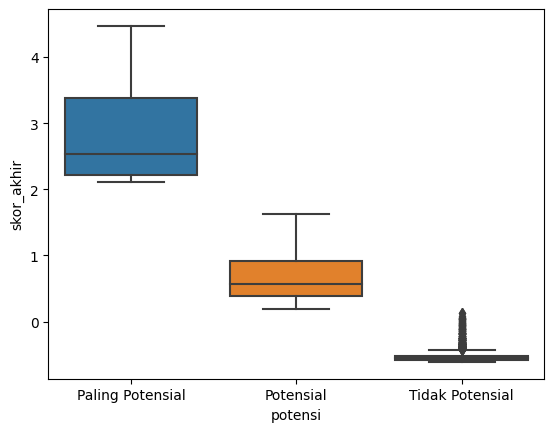

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='potensi', y='skor_akhir', data=df)
plt.show()


In [9]:
# Label cluster berdasarkan kolom "potensi"
cluster_labels = data['potensi'].replace({
    'Paling Potensial': 0,
    'Potensial': 1,
    'Tidak Potensial': 2
}).values

# Hitung silhouette score
silhouette_avg = silhouette_score(data[['skor_akhir']], cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.9141068647998779


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=2: 0.9376


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=3: 0.8683


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=4: 0.8111


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=5: 0.8035


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=6: 0.7301


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=7: 0.6896


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=8: 0.6580


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=9: 0.6446


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=10: 0.6492


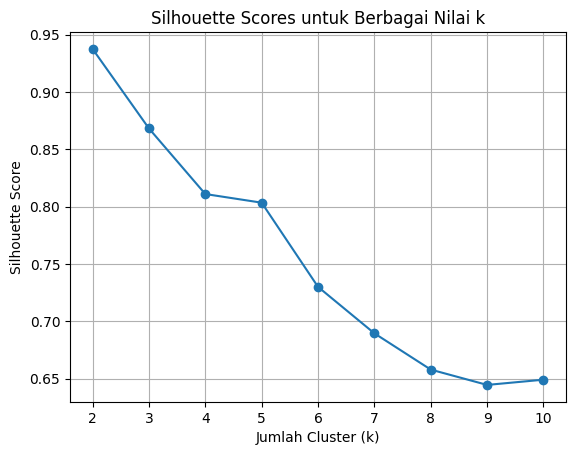

In [14]:
from sklearn.preprocessing import StandardScaler  # Tambahkan impor ini
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Normalisasi data (jika belum dilakukan sebelumnya)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[['skor_akhir']])

# Inisialisasi list untuk menyimpan skor Silhouette
silhouette_scores = []

# Coba nilai k dari 2 hingga 10
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")  # Cetak nilai Silhouette Score

# Plot hasilnya
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores untuk Berbagai Nilai k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [15]:
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Load data dari file Excel
file_path = "gabungan_clustering_satu_sheet.xlsx"  # Pastikan file berada di direktori kerja Anda
df = pd.read_excel(file_path)
df['potensi'].value_counts()

potensi
Minat Rendah    3529
Minat Sedang    1902
Minat Tinggi     214
Name: count, dtype: int64

In [16]:
df.groupby('potensi')['skor_normalized'].describe()

,count,mean,std,min,25%,50%,75%,max
potensi,,,,,,,,
Minat Rendah,3529.0,-0.428697,0.372486,-1.420515,-0.781609,-0.410770,-0.144630,0.768994
Minat Sedang,1902.0,0.434382,0.647632,-0.440849,0.030546,0.323951,0.660380,5.933826
Minat Tinggi,214.0,3.208762,2.320908,0.783732,1.716934,2.653817,3.726276,14.173704


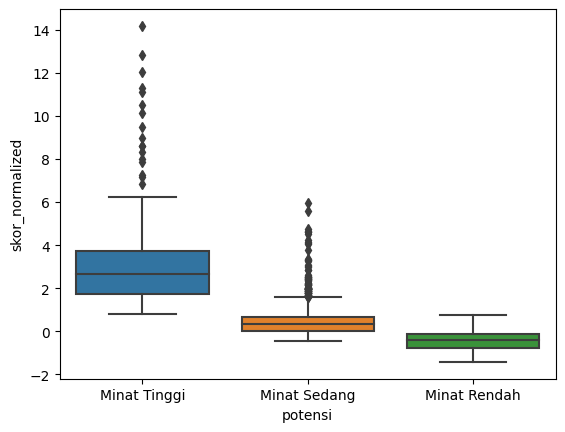

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='potensi', y='skor_normalized', data=df)
plt.show()

In [20]:
# Label cluster berdasarkan kolom "potensi"
cluster_labels = df['potensi'].replace({
    'Minat Tinggi': 0,
    'Minat Sedang': 1,
    'Minat Rendah': 2
}).values

# Hitung silhouette score
silhouette_avg = silhouette_score(df[['skor_normalized']], cluster_labels)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.3629931570830908


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=2: 0.7710


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=3: 0.5780


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=4: 0.5711


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=5: 0.5752


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=6: 0.5837


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=7: 0.5847


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=8: 0.5946


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=9: 0.5956


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score untuk k=10: 0.5978


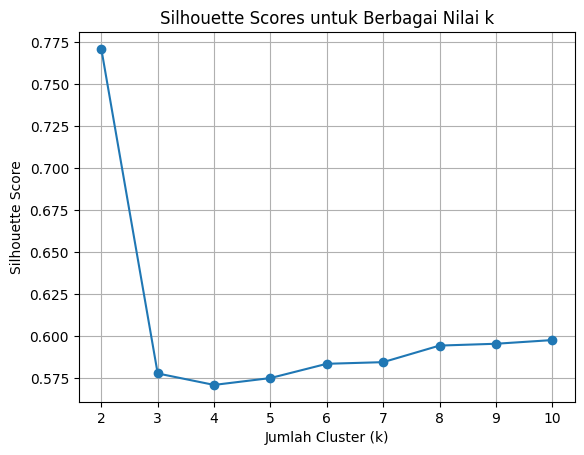

In [21]:
from sklearn.preprocessing import StandardScaler  # Tambahkan impor ini
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Normalisasi data (jika belum dilakukan sebelumnya)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['skor_normalized']])

# Inisialisasi list untuk menyimpan skor Silhouette
silhouette_scores = []

# Coba nilai k dari 2 hingga 10
range_clusters = range(2, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_scaled)
    score = silhouette_score(data_scaled, cluster_labels)
    silhouette_scores.append(score)
    print(f"Silhouette Score untuk k={k}: {score:.4f}")  # Cetak nilai Silhouette Score

# Plot hasilnya
plt.plot(range_clusters, silhouette_scores, marker='o')
plt.title('Silhouette Scores untuk Berbagai Nilai k')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.xticks(range_clusters)
plt.grid(True)
plt.show()


In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Inisialisasi list untuk menyimpan skor silhouette
silhouette_scores = []

# Coba berbagai nilai k dari 2 hingga 10
for k in range(2, 11):
    # Lakukan clustering menggunakan KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data[['skor_akhir']])
    
    # Hitung silhouette score dan simpan hasilnya
    silhouette_avg = silhouette_score(data[['skor_akhir']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Tampilkan skor silhouette untuk setiap k
for k, score in zip(range(2, 11), silhouette_scores):
    print(f"Silhouette Score untuk k={k}: {score}")


c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Silhouette Score untuk k=2: 0.9375835725587226
Silhouette Score untuk k=3: 0.8682517302484934
Silhouette Score untuk k=4: 0.8110612352175695
Silhouette Score untuk k=5: 0.803522347691209
Silhouette Score untuk k=6: 0.7301189223728852
Silhouette Score untuk k=7: 0.6896037984467638
Silhouette Score untuk k=8: 0.6579931297610541
Silhouette Score untuk k=9: 0.6446332352195496
Silhouette Score untuk k=10: 0.6491954771708356
